# Iterations on preprocessing

Let's restart from scratch on lowercased questions.

Note we will loose some information by lowercasing everything...


In [39]:
# Ugly incantation to make our 'framework' working
import sys
sys.path.insert(0, r'/SAPDevelop/QuoraPairs/BruteForce/Tools')

#import all our small tools (paths, cache, print,zip,excel, pandas, progress,..)
from Tools.all import *

# setup the name of our experiment
# it will be used to store every result in a unique place
EXPERIMENT='fast_nlu'
# Do a bit of checks before actually running long code
UNITARY_TEST = True
print_alert('You will use environment %s' % EXPERIMENT)

prepare_environnement(EXPERIMENT)

In [4]:
# print('reading train')
# train_dataframe=pandas.read_csv('../PandasStore/train_clean_everything.csv',error_bad_lines=True,warn_bad_lines=True)
# print('train ',train_dataframe.shape)
# print('reading challenge')
# challenge_dataframe=pandas.read_csv('../PandasStore/challenge_clean_everything.csv',error_bad_lines=True,warn_bad_lines=True) 
# print('challenge ',challenge_dataframe.shape)

# assert set(all_numeric_columns(train_dataframe)) == set(all_numeric_columns(challenge_dataframe))
# print('Looks like OK')

reading train
train  (404290, 225)
reading challenge
challenge  (2345796, 221)
Looks like OK


In [5]:
#save_global_dataframe(train_dataframe,'train_clean_everything')
#save_global_dataframe(challenge_dataframe,'challenge_clean_everything')

In [7]:

train_dataframe=load_global_dataframe('train_clean_everything')
challenge_dataframe=load_global_dataframe('challenge_clean_everything')

print('train ',train_dataframe.shape)
print('challenge ',challenge_dataframe.shape)

assert set(all_numeric_columns(train_dataframe)) == set(all_numeric_columns(challenge_dataframe))
print('Looks like OK')

train  (404290, 225)
challenge  (2345796, 221)
Looks like OK


Time to check all the columns we have

In [8]:
def show_columns(dataframe,dataset_name):
    print_section('%d lines of %d columns of %s:' % (len(dataframe),len(dataframe.columns),dataset_name))
    i = 1
    for c in all_numeric_columns(dataframe):
        print(i,c)
        i+=1

show_columns(train_dataframe,'train')
show_columns(challenge_dataframe,'challenge')


1 nb_words_question1
2 nb_words_question2
3 nb_common_words
4 nb_common_words/nb_words_question1
5 nb_common_words/nb_words_question2
6 nb_words_question1-common_words
7 nb_words_question2-common_words
8 nb_common_words/(nb_words_question1+nb_words_question2)
9 nltk_nb_words_question1
10 nltk_nb_words_question2
11 nltk_nb_common_words
12 nltk_nb_common_words/nltk_nb_words_question1
13 nltk_nb_common_words/nltk_nb_words_question2
14 nltk_nb_words_question1-nltk_common_words
15 nltk_nb_words_question2-nltk_common_words
16 nltk_nb_common_words/(nltk_nb_words_question1+nltk_nb_words_question2)
17 all_nb_words_question1
18 all_nb_words_question2
19 all_nb_common_words
20 all_nb_common_words/all_nb_words_question1
21 all_nb_common_words/all_nb_words_question2
22 all_nb_words_question1-all_common_words
23 all_nb_words_question2-all_common_words
24 all_nb_common_words/(all_nb_words_question1+all_nb_words_question2)
25 clean_all_nb_words_question1
26 clean_all_nb_words_question2
27 clean_all_nb

1 nb_words_question1
2 nb_words_question2
3 nb_common_words
4 nb_common_words/nb_words_question1
5 nb_common_words/nb_words_question2
6 nb_words_question1-common_words
7 nb_words_question2-common_words
8 nb_common_words/(nb_words_question1+nb_words_question2)
9 nltk_nb_words_question1
10 nltk_nb_words_question2
11 nltk_nb_common_words
12 nltk_nb_common_words/nltk_nb_words_question1
13 nltk_nb_common_words/nltk_nb_words_question2
14 nltk_nb_words_question1-nltk_common_words
15 nltk_nb_words_question2-nltk_common_words
16 nltk_nb_common_words/(nltk_nb_words_question1+nltk_nb_words_question2)
17 all_nb_words_question1
18 all_nb_words_question2
19 all_nb_common_words
20 all_nb_common_words/all_nb_words_question1
21 all_nb_common_words/all_nb_words_question2
22 all_nb_words_question1-all_common_words
23 all_nb_words_question2-all_common_words
24 all_nb_common_words/(all_nb_words_question1+all_nb_words_question2)
25 clean_all_nb_words_question1
26 clean_all_nb_words_question2
27 clean_all_nb

Let's play a little bit with nlu

How much these adjusted features are better than basic ones ?

Let's check AUCs 

In [10]:
from sklearn.metrics import roc_auc_score

def simple_AUC(dataframe,column_name):
    return roc_auc_score(y_true=dataframe['is_duplicate'],y_score=dataframe[column_name])

def simple_weighted_AUC(dataframe,column_name):
    return roc_auc_score(y_true=dataframe['is_duplicate'],y_score=dataframe[column_name],sample_weight=dataframe['weight'])

def show_AUC(dataframe,column_name):
    if 'weight' in dataframe.columns:
        print('Weighted AUC %s %f' % (column_name,simple_weighted_AUC(dataframe,column_name)))
    else:
        print('AUC %s %f' % (column_name,simple_AUC(dataframe,column_name)))
        

def display_simple_AUC(dataframe,column_name):
    palette = sns.color_palette()
    as_hist(dataframe[column_name][dataframe['is_duplicate']==1],bins="blocks",color=palette[3],label='Same',histtype='step')
    as_hist(dataframe[column_name][dataframe['is_duplicate']==0],bins="blocks",color=palette[2],label='Different',alpha = 0.75,histtype='step')
    plot.title('AUC %s : %f' % (column_name,simple_AUC(dataframe,column_name)) , fontsize=10)
    plot.xlabel(column_name)
    plot.ylabel('Nb')
    plot.legend()



def show_all_simple_AUC(dataframe):
    all =  all_numeric_columns(dataframe)
    print_section( 'Show AUC on %d unique features' % len(all))
    for name in all:
        show_AUC(dataframe,name)


show_all_simple_AUC(train_dataframe)


Weighted AUC nb_words_question1 0.416846
Weighted AUC nb_words_question2 0.421823
Weighted AUC nb_common_words 0.682908
Weighted AUC nb_common_words/nb_words_question1 0.728826
Weighted AUC nb_common_words/nb_words_question2 0.731133
Weighted AUC nb_words_question1-common_words 0.314964
Weighted AUC nb_words_question2-common_words 0.317145
Weighted AUC nb_common_words/(nb_words_question1+nb_words_question2) 0.741120
Weighted AUC nltk_nb_words_question1 0.406615
Weighted AUC nltk_nb_words_question2 0.412457
Weighted AUC nltk_nb_common_words 0.726849
Weighted AUC nltk_nb_common_words/nltk_nb_words_question1 0.771614
Weighted AUC nltk_nb_common_words/nltk_nb_words_question2 0.768482
Weighted AUC nltk_nb_words_question1-nltk_common_words 0.289178
Weighted AUC nltk_nb_words_question2-nltk_common_words 0.295027
Weighted AUC nltk_nb_common_words/(nltk_nb_words_question1+nltk_nb_words_question2) 0.780440
Weighted AUC all_nb_words_question1 0.403675
Weighted AUC all_nb_words_question2 0.410945


Just a couple of graphs to see how much adjusted features are different than basic ones

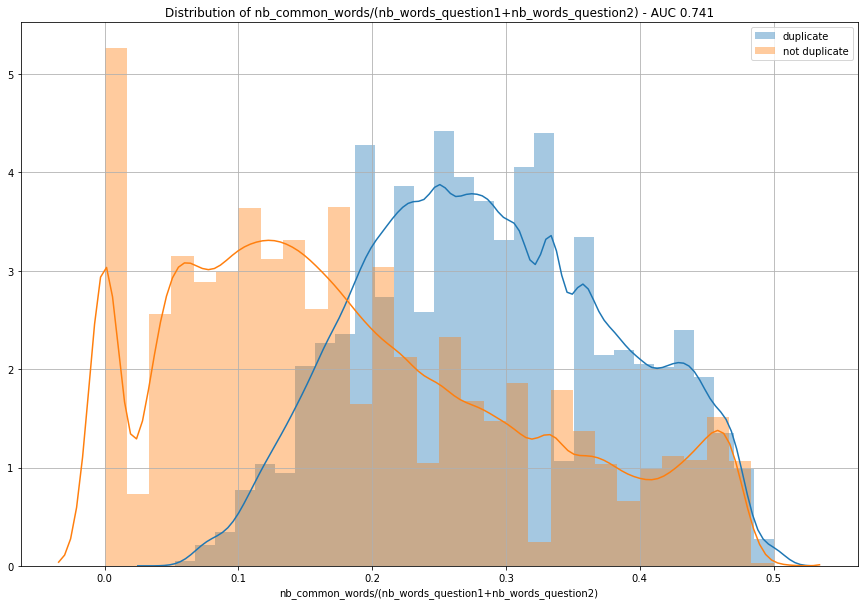

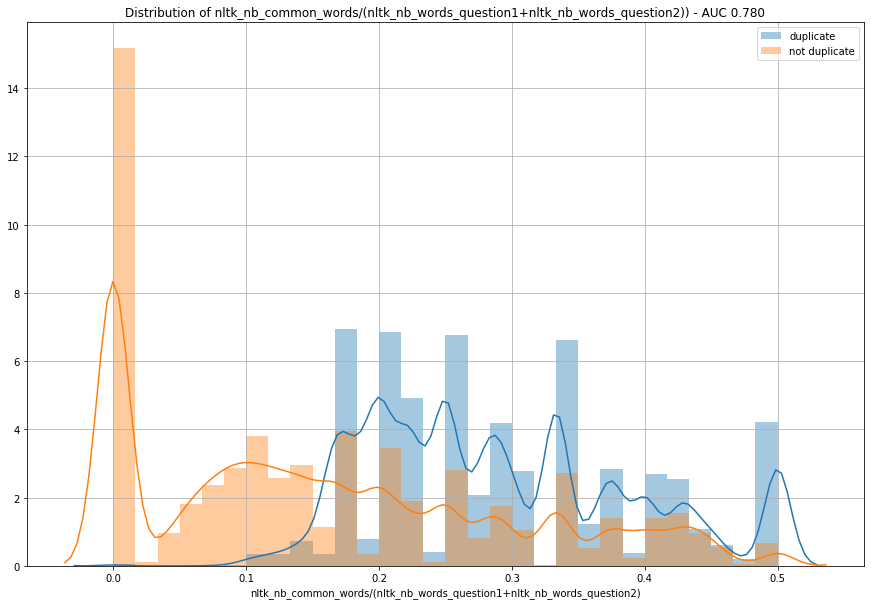

In [11]:
plot.figure(figsize=(15,10))
sns.distplot(train_dataframe[train_dataframe['is_duplicate']==1]['nb_common_words/(nb_words_question1+nb_words_question2)'], bins=30, label='duplicate', kde=True)  
sns.distplot(train_dataframe[train_dataframe['is_duplicate']==0]['nb_common_words/(nb_words_question1+nb_words_question2)'], bins=30,   label='not duplicate', kde=True)
plot.title('Distribution of nb_common_words/(nb_words_question1+nb_words_question2) - AUC %.3f' %simple_weighted_AUC(train_dataframe,'nb_common_words/(nb_words_question1+nb_words_question2)'))
plot.grid(True)
plot.legend()
plot_save('distribution_ratio_no_stopwords')

plot.figure(figsize=(15,10))
sns.distplot(train_dataframe[train_dataframe['is_duplicate']==1]['nltk_nb_common_words/(nltk_nb_words_question1+nltk_nb_words_question2)'], bins=30, label='duplicate', kde=True)    
sns.distplot(train_dataframe[train_dataframe['is_duplicate']==0]['nltk_nb_common_words/(nltk_nb_words_question1+nltk_nb_words_question2)'], bins=30,   label='not duplicate', kde=True)
plot.title('Distribution of nltk_nb_common_words/(nltk_nb_words_question1+nltk_nb_words_question2)) - AUC %.3f' %simple_weighted_AUC(train_dataframe,'nltk_nb_common_words/(nltk_nb_words_question1+nltk_nb_words_question2)'))
plot.grid(True)
plot.legend()
plot_save('distribution_ratio_nltk_stopwords')


Just focus on the correlation matrix of non semantic features

is_duplicate                                                                                1.000000
all_nb_common_words/(all_nb_words_question1+all_nb_words_question2)                         0.456488
nltk_nb_common_words/(nltk_nb_words_question1+nltk_nb_words_question2)                      0.456047
all_nb_common_words/all_nb_words_question1                                                  0.447348
nltk_nb_common_words/nltk_nb_words_question1                                                0.445528
all_nb_common_words/all_nb_words_question2                                                  0.440822
nltk_nb_common_words/nltk_nb_words_question2                                                0.440107
lemmatized_nb_common_words/(lemmatized_nb_words_question1+lemmatized_nb_words_question2)    0.423128
clean_all_nb_common_words/(clean_all_nb_words_question1+clean_all_nb_words_question2)       0.422021
clean_all_nb_common_words/clean_all_nb_words_question1                                     

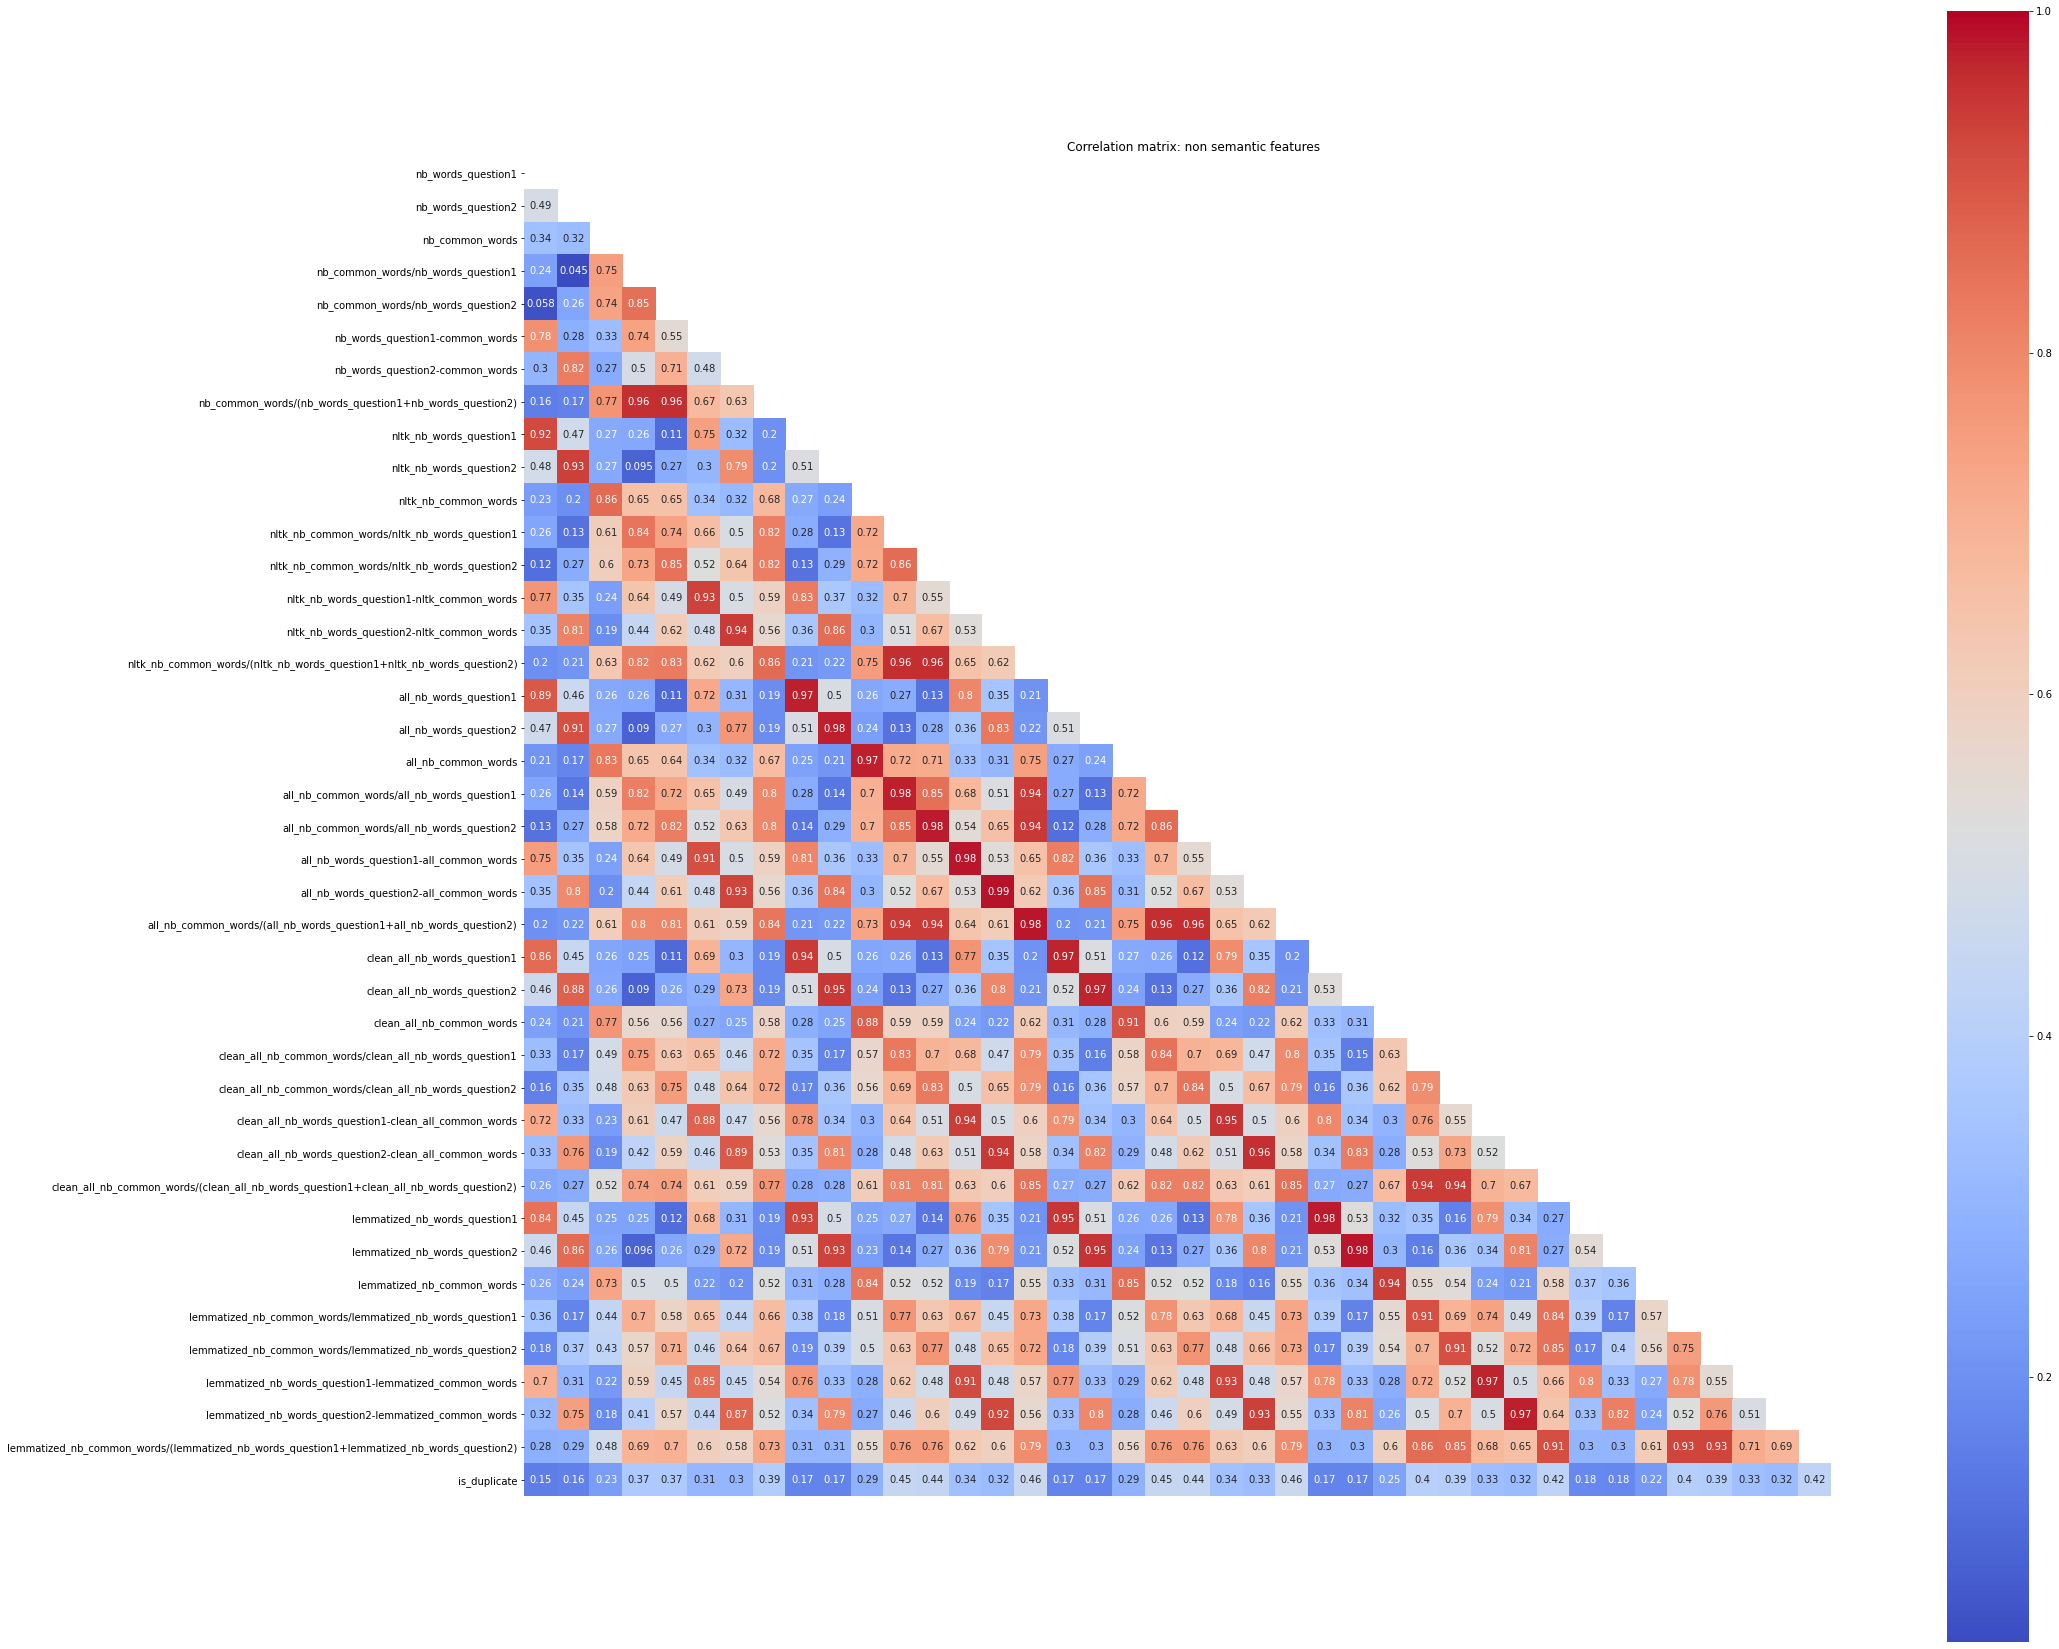

In [14]:
    def show_correlation_matrix(input_df,columns):
        correlation_matrix = input_df[columns].corr().abs()
        print(correlation_matrix['is_duplicate'].nlargest(len(columns)))

        correlation_matrix_without_is_duplicate = correlation_matrix['is_duplicate'][correlation_matrix['is_duplicate']<1]
        highest_correlated_feature = correlation_matrix_without_is_duplicate.nlargest(1).index[0]
        highest_correlation = correlation_matrix_without_is_duplicate.nlargest(1)[0]
        if highest_correlation >0.2:
            if highest_correlation < 0.5:
                print_warning('%s is the most correlated with target but %f is quite weak' % (highest_correlated_feature,highest_correlation))
            else:
                print_info('%s is the most correlated with target but %f is very weak' % (highest_correlated_feature,highest_correlation))
        else:
            print_alert('%s is the most correlated with target and %f is quite big' % (highest_correlated_feature,highest_correlation))
        plot.figure(figsize=(30, 30))
        plot.title('Correlation matrix: non semantic features')
        sns.heatmap(correlation_matrix,annot=True,cbar=True,square=True,cmap='coolwarm',mask = numpy.triu(correlation_matrix),xticklabels=False)
        
    NON_SEMANTIC_FEATURES = [c for c in all_numeric_columns(train_dataframe) if 'entities' not in c and 'news' not in c and 'proba' not in c and 'sim' not in c and 'confidence' not in c ] 
    NON_SEMANTIC_FEATURES.append('is_duplicate')

    show_correlation_matrix(train_dataframe,NON_SEMANTIC_FEATURES)
    plot_save('correlation_matrix_non_semantic_features')

Let's recap our available features

In [23]:
ALL_FEATURES=all_numeric_columns(train_dataframe)
print_info('We have %d features' % len(ALL_FEATURES))
display(pandas.DataFrame(ALL_FEATURES,columns=['feature']))

,feature
0,nb_words_question1
1,nb_words_question2
2,nb_common_words
3,nb_common_words/nb_words_question1
4,nb_common_words/nb_words_question2
...,...
210,2_6_ABBR_confidence
211,2_6_HUM_confidence
212,2_6_LOC_confidence
213,2_6_DESC_confidence


Exploring each combination of these 103 features (like we did in a first experiment with basic features) is not practical. We will just add one field at a time, build a model, keep metrics and figure what is happening.

A bunch of code to build xgboost models with basic set of parameters
The criteria to stop learning is aligned to kaggle's one: *logloss*

In [15]:
# Simple XGBoost code
# 

import xgboost 

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta' : 0.02,
    'max_depth':3 
    }

def print_res_xgboost(infos):
    # Glurk
    print_info(' | '.join([('%s '+f) % (k,infos[k]) for k,f in INFO_XGBOOST_MODEL.items() if k in infos]))

# 80% training 20% validation
def build_XGBoost_model_80_20(training,target,column_names,show=True):
    input_train,input_test,target_train,target_test = train_test_split(training,target,random_state=42,test_size=0.2)
    final_input_train = input_train[list(column_names)]
    final_input_test = input_test[list(column_names)]
    train_dm = xgboost.DMatrix(final_input_train, label = target_train, weight = input_train[WEIGHT],nthread = -1)
    validation_dm = xgboost.DMatrix(final_input_test, label = target_test,weight = input_test[WEIGHT])
    watchlist = [(train_dm, 'train'), (validation_dm, 'valid')]

    start = time.time()
    if show:
        verbose = 10
    else:
        verbose = 0
    model = xgboost.train(params,train_dm,400,watchlist,early_stopping_rounds=50,verbose_eval=verbose)
    infos = compute_metrics_model_xgboost(model,final_input_test,target_test,sample_weight = input_test[WEIGHT],show=show)
    duration = time.time()-start
    infos.update({'time':duration})
    if show:      
        print_res_xgboost(infos)
    return  infos

# Pushing the limits :100 % training no validation !!
# Just in case it allows to gain small digits in kaggle score...
# Actually not used ...
def build_XGBoost_model_100_0(training,target,column_names,show=True):
    final_train = training[list(column_names)]
    final_target = target
    final_weight = training[WEIGHT]

    train_dm = xgboost.DMatrix(final_train, label = final_target, weight = final_weight,nthread = -1)
    watchlist = [(train_dm, 'train')]

    start = time.time()
    if show:
        verbose = 10
    else:
        verbose = 0
    model = xgboost.train(params,train_dm,400,watchlist,early_stopping_rounds=50,verbose_eval=verbose)
    duration = time.time()-start
    infos = compute_metrics_model_xgboost(model,final_train,final_target,sample_weight = final_weight,show=show)
    infos.update({'time':duration})
    if show:      
        print_res_xgboost(infos)
    return  infos

def compute_metrics_model_xgboost(model,input_df,target_df,sample_weight = None,show = True):
    final_input = xgboost.DMatrix(input_df)
    prediction_proba_df = model.predict(final_input,ntree_limit=model.best_ntree_limit)
    # Hum shouldn't we challenge this 50% threshold ?
    prediction_df = numpy.where(prediction_proba_df>0.5,1,0)
    res = metrics.classification_report(target_df,prediction_df,sample_weight = sample_weight,output_dict=True)
    accuracy = res['accuracy']
    score = res['weighted avg']['f1-score']
    logloss_proba = metrics.log_loss(target_df,prediction_proba_df,sample_weight = sample_weight)
    if show:
        print_info('Classification report')
        print(metrics.classification_report(target_df,prediction_df,sample_weight = sample_weight))
    return {
             'accuracy':accuracy,
             'score':score,
             'logloss_proba':logloss_proba,
             'model':model
           }

INFO_XGBOOST_MODEL= {
    'logloss_proba': '%.4f',
    'score': '%.4f',
    'accuracy': '%.4f',
    'time': '%.2f'
}

if UNITARY_TEST:
    print_section('Unitary test : playbox XGBoost 80_20')
    small_train = train_dataframe.sample(1000,random_state=42)
    print_section('Unitary test : playbox XGBoost 100_0')
    res = build_XGBoost_model_100_0(small_train,small_train['is_duplicate'],all_numeric_columns(small_train))
    print(res)

if UNITARY_TEST:
    print_section('Unitary test : playbox XGBoost 80_20')
    small_train = train_dataframe.sample(1000,random_state=42)
    print_section('Unitary test : playbox XGBoost 80_20')
    res = build_XGBoost_model_80_20(small_train,small_train['is_duplicate'],all_numeric_columns(small_train))
    print(res)

[0]	train-logloss:0.68192
Will train until train-logloss hasn't improved in 50 rounds.
[10]	train-logloss:0.59005
[20]	train-logloss:0.52473
[30]	train-logloss:0.47624
[40]	train-logloss:0.43911
[50]	train-logloss:0.41049
[60]	train-logloss:0.38744
[70]	train-logloss:0.36885
[80]	train-logloss:0.35295
[90]	train-logloss:0.33969
[100]	train-logloss:0.32867
[110]	train-logloss:0.31960
[120]	train-logloss:0.31170
[130]	train-logloss:0.30522
[140]	train-logloss:0.29942
[150]	train-logloss:0.29429
[160]	train-logloss:0.28919
[170]	train-logloss:0.28450
[180]	train-logloss:0.28029
[190]	train-logloss:0.27630
[200]	train-logloss:0.27292
[210]	train-logloss:0.26934
[220]	train-logloss:0.26541
[230]	train-logloss:0.26180
[240]	train-logloss:0.25803
[250]	train-logloss:0.25465
[260]	train-logloss:0.25088
[270]	train-logloss:0.24701
[280]	train-logloss:0.24420
[290]	train-logloss:0.24101
[300]	train-logloss:0.23786
[310]	train-logloss:0.23505
[320]	train-logloss:0.23223
[330]	train-logloss:0.2291

              precision    recall  f1-score   support

           0       0.92      1.00      0.96 833.5098453967706
           1       0.99      0.56      0.72 171.66892895091271

    accuracy                           0.92 1005.1787743476833
   macro avg       0.95      0.78      0.84 1005.1787743476833
weighted avg       0.93      0.92      0.92 1005.1787743476833



{'accuracy': 0.9243623066294024, 'score': 0.9156718237724215, 'logloss_proba': 0.21092878848449984, 'model': <xgboost.core.Booster object at 0x7f1a655a8b50>, 'time': 1.4655265808105469}


[0]	train-logloss:0.68200	valid-logloss:0.68156
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 50 rounds.
[10]	train-logloss:0.59063	valid-logloss:0.58683
[20]	train-logloss:0.52461	valid-logloss:0.52093
[30]	train-logloss:0.47618	valid-logloss:0.47270
[40]	train-logloss:0.43907	valid-logloss:0.43662
[50]	train-logloss:0.40980	valid-logloss:0.40954
[60]	train-logloss:0.38661	valid-logloss:0.38886
[70]	train-logloss:0.36775	valid-logloss:0.37242
[80]	train-logloss:0.35257	valid-logloss:0.35935
[90]	train-logloss:0.33975	valid-logloss:0.35041
[100]	train-logloss:0.32886	valid-logloss:0.34321
[110]	train-logloss:0.31952	valid-logloss:0.33724
[120]	train-logloss:0.31130	valid-logloss:0.33239
[130]	train-logloss:0.30399	valid-logloss:0.32860
[140]	train-logloss:0.29778	valid-logloss:0.32515
[150]	train-logloss:0.29198	valid-logloss:0.32227
[160]	train-logloss:0.28642	valid-logloss:0.31996
[170]	trai

              precision    recall  f1-score   support

           0       0.86      0.97      0.91 168.7955573880411
           1       0.58      0.21      0.31 33.5771183347514

    accuracy                           0.84 202.37267572279248
   macro avg       0.72      0.59      0.61 202.37267572279248
weighted avg       0.81      0.84      0.81 202.37267572279248



{'accuracy': 0.8432726572471984, 'score': 0.811638497752863, 'logloss_proba': 0.3115694782603947, 'model': <xgboost.core.Booster object at 0x7f1a653180d0>, 'time': 1.0417606830596924}


Before launching bigh models, let's check again what we have.
Here are the numeric columns (ids and target have been removed) in train dataset

In [17]:
assert set(all_numeric_columns(train_dataframe)) == set(all_numeric_columns(challenge_dataframe)), 'Oups train and challenge do not have the same numeric columns'
print_info('train and challenge datasets have the same numeric columns ')
i = 1
for c in all_numeric_columns(train_dataframe):
    print(i,c)
    i +=1



1 nb_words_question1
2 nb_words_question2
3 nb_common_words
4 nb_common_words/nb_words_question1
5 nb_common_words/nb_words_question2
6 nb_words_question1-common_words
7 nb_words_question2-common_words
8 nb_common_words/(nb_words_question1+nb_words_question2)
9 nltk_nb_words_question1
10 nltk_nb_words_question2
11 nltk_nb_common_words
12 nltk_nb_common_words/nltk_nb_words_question1
13 nltk_nb_common_words/nltk_nb_words_question2
14 nltk_nb_words_question1-nltk_common_words
15 nltk_nb_words_question2-nltk_common_words
16 nltk_nb_common_words/(nltk_nb_words_question1+nltk_nb_words_question2)
17 all_nb_words_question1
18 all_nb_words_question2
19 all_nb_common_words
20 all_nb_common_words/all_nb_words_question1
21 all_nb_common_words/all_nb_words_question2
22 all_nb_words_question1-all_common_words
23 all_nb_words_question2-all_common_words
24 all_nb_common_words/(all_nb_words_question1+all_nb_words_question2)
25 clean_all_nb_words_question1
26 clean_all_nb_words_question2
27 clean_all_nb

Let's check again the impact of entities

In [18]:
ALL_NB_ENTITIES=[c for c in all_numeric_columns(train_dataframe) if 'enti' in c and 'ratio' not in c]
print(ALL_NB_ENTITIES)
def sniff_entities(r):
    for c in ALL_NB_ENTITIES:
        if r[c]>0:
            return 1
    return 0

res = train_dataframe.progress_apply(sniff_entities,axis=1)
print_info('%.2f %% of pairs have some detected entities' % (res.mean()*100.))




['nb_entities_GPE_question1', 'nb_entities_PERSON_question1', 'nb_entities_PRODUCT_question1', 'nb_entities_ORG_question1', 'nb_entities_DATE_question1', 'nb_entities_NORP_question1', 'nb_entities_WORK_OF_ART_question1', 'nb_entities_LANGUAGE_question1', 'nb_entities_EVENT_question1', 'nb_entities_FAC_question1', 'nb_entities_LAW_question1', 'nb_entities_LOC_question1', 'nb_entities_GPE_question2', 'nb_entities_PERSON_question2', 'nb_entities_PRODUCT_question2', 'nb_entities_ORG_question2', 'nb_entities_DATE_question2', 'nb_entities_NORP_question2', 'nb_entities_WORK_OF_ART_question2', 'nb_entities_LANGUAGE_question2', 'nb_entities_EVENT_question2', 'nb_entities_FAC_question2', 'nb_entities_LAW_question2', 'nb_entities_LOC_question2', 'nb_entities_common_GPE', 'nb_entities_common_PERSON', 'nb_entities_common_PRODUCT', 'nb_entities_common_ORG', 'nb_entities_common_DATE', 'nb_entities_common_NORP', 'nb_entities_common_WORK_OF_ART', 'nb_entities_common_LANGUAGE', 'nb_entities_common_EVENT

Another bunch of code. Just wrappers so we do in one shot:
* generate a set of models given a set of columns
* keep their results in memory
* save all models to excel
* dump everything (including the models) in a cache so all previous steps can be done in a sec
* find the best model (related to logloss)
* generate a file of predictions suitable for kaggle
* prepare everything for a kaggle submission
* show the statement to do the submission to kaggle


Current exploration methods available, given n columns
* generate models using from 1 to n columns (24 columns will generate 24 models)
* only one model with all the columns provided as parameter

In [21]:
def find_best_result(results,metric):
    if 'logloss' in metric:
        return results.nsmallest(1,metric)
    else:
        return results.nlargest(1,metric)
        
def apply_xgboost(model,columns,input_df):
    res = pandas.DataFrame()
    res['test_id'] = input_df['test_id']
    res['is_duplicate'] = model.predict(xgboost.DMatrix(input_df[columns]))
    return res

def submit_best_result(results,input_df,file_name,kaggle_message,metric='logloss_proba'):
    start = time.time()
    print_section("Scoring XGBoost model with best %s: %s" % (metric,kaggle_message))
    csv_file_name = absolute_env_file_name(file_name,ext='.csv')
    print_info('Generating scores in %s' % csv_file_name)
    best = find_best_result(results,metric)
    model = best['model'][0]
    columns = best['columns'][0]
    prediction = apply_xgboost(model,columns,input_df)
    prediction.to_csv(csv_file_name,index=False)
    print_info('Zipping file')
    absolute_file_name_zip = zip_file_and_delete(csv_file_name)
    print_done('Done',top=start)
    print_info('%s is ready' % absolute_file_name_zip)
    print_warning('Use this commands to submit apply results to kaggle')
    print_warning('kaggle competitions submit quora-question-pairs -f "%s" -m "%s %s"' % (absolute_file_name_zip,EXPERIMENT,kaggle_message))
    return prediction

def n_columns(columns,n):
    return columns[0:n]

def xgboost_80_20_one_more_field_at_a_time(dataframe,columns_to_explore,explore=True,show=False):
    if explore:
        print_section("XGBoost (80,20) on 1 to %d fields" % len(columns_to_explore))
    else:
        print_section("XGBoost (80,20) on %d fields" % len(columns_to_explore))
    start = time.time()
    res_final = dict()
    min_log_loss = 1000
    best = 0
    best_cols =''
    # a shortcut is possible
    if explore:
        first_nb = 1
    else:
        first_nb=len(columns_to_explore)
    for i in tqdm(range(first_nb,len(columns_to_explore)+1)):
        columns = n_columns(columns_to_explore,i)
        res = build_XGBoost_model_80_20(dataframe,dataframe['is_duplicate'],columns,show = show)
        cur_logloss = res['logloss_proba']
        cur_accuracy = res['accuracy']
        cur_score = res['score']
        if cur_logloss<min_log_loss:
            print_info("%d:%.4f %.4f %.4f %s" % (i,cur_logloss,cur_accuracy,cur_score,columns))
            min_log_loss = cur_logloss
            best_cols = columns
            best = i
        else:
            print_warning("%d:%.4f %.4f %.4f %s" % (i,cur_logloss,cur_accuracy,cur_score,columns))
        res.update( {'columns':columns})
        res_final.update({str(i):res})
    print_info('Best: %d %.4f %s' % (best,min_log_loss,best_cols))
    print_done('Done',top=start)
    return pandas.DataFrame.from_dict(res_final, orient='index')

# try to reload from cache an exploration
# if not available, redo it and save results in cache
# find the best result according to a metric (default logloss_proba)
# and submit it to kaggle
def study_models_one_more_field_at_a_time(message,tag,columns,train_df,challenge_df,explore=True,show=False):
    print_section(message)
    results = load_or_build_dataframe('Rebuild XGBoost models',tag + '_results',lambda df:xgboost_80_20_one_more_field_at_a_time(df,columns,explore=explore,show=show),train_df)
    save_models_dict_to_excel(results,tag=tag)
    display(results.describe())
    submit_best_result(results,challenge_df,'Best_'+tag,'Best ' + tag)
    return results

A little bit long but results are saved in a cache so next time will be fast

In [24]:
xgboost_everything_results = study_models_one_more_field_at_a_time(
    'all features_not_cleaned',
    'all_features_not_cleaned',
    ALL_FEATURES,
    train_dataframe,
    challenge_dataframe,
    explore = True,
    show = False)

KeyboardInterrupt: 

We graph the logloss obtained adding one field at a time from:
* basic features on non processed data
* same features with a first set of stop words removed
* same features with more stop words removed
* same features with more stop words after cleaning
* same features with more stop words after cleaning and lemmatisation
* Entities 
* newsgroups
* similarity computed by spacy lib

Obviously, this graph does not prove anything as another order of fields would generate a totally different graph but we can still say:
* all preprocessing informations provide some enhancement
* expanding list of stop words provides only marginal enhancement. **Again**, this does not mean features built with full list of stop words does not provide informations. It does provide a little bit more information to the ones already available
* lemmatisation is useful in our context
* entities do not provide much more informations
* spacy similarity does enhance the model but not dramatically
* optimising hyperparameters is quite efficient

Challenging the need of a feature on the final model is done later

Let's start with all non semantic features

In [ ]:
plot.figure(figsize=(10,10))

pal=sns.color_palette()
plot.ylim(0.3,0.5)
plot.plot(numpy.arange(1,9,1),xgboost_everything_results['logloss_proba'][1:9],color=pal[1],alpha=0.3)
plot.fill_between(numpy.arange(1,9,1),xgboost_everything_results['logloss_proba'][1:9],label='basic',color=pal[1],alpha=0.3)

plot.plot(numpy.arange(8,17,1),xgboost_everything_results['logloss_proba'][8:17],color=pal[2],alpha=0.3)
plot.fill_between(numpy.arange(8,17,1),xgboost_everything_results['logloss_proba'][8:17],label='nltk stopwords',color=pal[2],alpha=0.3)

plot.plot(numpy.arange(16,25,1),xgboost_everything_results['logloss_proba'][16:25],color=pal[3],alpha=0.3)
plot.fill_between(numpy.arange(16,25,1),xgboost_everything_results['logloss_proba'][16:25],label='nltk +sklearn stopwords',color=pal[3],alpha=0.3)

plot.plot(numpy.arange(24,33,1),xgboost_everything_results['logloss_proba'][24:33],color=pal[4],alpha=0.3)
plot.fill_between(numpy.arange(24,33,1),xgboost_everything_results['logloss_proba'][24:33],label='nltk +sklearn stopwords+clean',color=pal[4],alpha=0.3)

plot.plot(numpy.arange(32,41,1),xgboost_everything_results['logloss_proba'][32:41],color=pal[5],alpha=0.3)
plot.fill_between(numpy.arange(32,41,1),xgboost_everything_results['logloss_proba'][32:41],label='nltk +sklearn stopwords+clean+lemme',color=pal[5],alpha=0.3)

plot.title('xgboost on non semantic features: logloss/Nb fields')
plot.xlabel('Nb fields')
plot.grid(True)
plot.legend()
plot_save('xgboost_all_features_all_preprocess_non_semantic')

Now, let's plot the model with semantic features : entities+newsgroup+similarity

In [ ]:

plot.figure(figsize=(10,10))

pal=sns.color_palette()
plot.ylim(0.3,0.5)
plot.plot(numpy.arange(1,9,1),xgboost_everything_results['logloss_proba'][1:9],color=pal[1],alpha=0.3)
plot.fill_between(numpy.arange(1,9,1),xgboost_everything_results['logloss_proba'][1:9],label='basic',color=pal[1],alpha=0.3)

plot.plot(numpy.arange(8,17,1),xgboost_everything_results['logloss_proba'][8:17],color=pal[2],alpha=0.3)
plot.fill_between(numpy.arange(8,17,1),xgboost_everything_results['logloss_proba'][8:17],label='nltk stopwords',color=pal[2],alpha=0.3)

plot.plot(numpy.arange(16,25,1),xgboost_everything_results['logloss_proba'][16:25],color=pal[3],alpha=0.3)
plot.fill_between(numpy.arange(16,25,1),xgboost_everything_results['logloss_proba'][16:25],label='nltk +sklearn stopwords',color=pal[3],alpha=0.3)

plot.plot(numpy.arange(24,33,1),xgboost_everything_results['logloss_proba'][24:33],color=pal[4],alpha=0.3)
plot.fill_between(numpy.arange(24,33,1),xgboost_everything_results['logloss_proba'][24:33],label='nltk +sklearn stopwords+clean',color=pal[4],alpha=0.3)

plot.plot(numpy.arange(32,41,1),xgboost_everything_results['logloss_proba'][32:41],color=pal[5],alpha=0.3)
plot.fill_between(numpy.arange(32,41,1),xgboost_everything_results['logloss_proba'][32:41],label='nltk +sklearn stopwords+clean+lemme',color=pal[5],alpha=0.3)

plot.plot(numpy.arange(40,89,1),xgboost_everything_results['logloss_proba'][40:89],color=pal[6],alpha=0.3)
plot.fill_between(numpy.arange(40,89,1),xgboost_everything_results['logloss_proba'][40:89],label='nltk +sklearn stopwords+clean+entities',color=pal[6],alpha=0.3)

plot.plot(numpy.arange(88,103,1),xgboost_everything_results['logloss_proba'][88:103],color=pal[7],alpha=0.3)
plot.fill_between(numpy.arange(88,103,1),xgboost_everything_results['logloss_proba'][88:103],label='nltk +sklearn stopwords+clean+entities+newsgroups',color=pal[7],alpha=0.3)

plot.plot(numpy.arange(101,103,1),xgboost_everything_results['logloss_proba'][101:103],color=pal[8],alpha=0.3)
plot.fill_between(numpy.arange(101,103,1),xgboost_everything_results['logloss_proba'][101:103],label='nltk +sklearn stopwords+clean+entities+newsgroups+similarity',color=pal[8],alpha=0.3)
plot.title('xgboost: logloss/Nb fields')
plot.xlabel('Nb fields')
plot.grid(True)
plot.legend()
plot_save('all_features_all_preprocess')

We have now a model using all features (even if we know some features provide only small information)

Let's optimize this model by searching bets set of hyperparameters.

We have use hyperopt library to search the best model between 500 models exploring a vast set of parameters.

Each model is evaluated on its logloss : we keep following the kaggle challenge

In [62]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

def hyperopt_optimize(training,target,column_names,trials,show=False):

    parameters_space = {
        'n_estimators': hp.quniform('n_estimators', 100, 1000, 1),
        'eta': hp.quniform('eta', 0.025, 0.5, 0.025),
        # A problem with max_depth casted to float instead of int with
        # the hp.quniform method.
        'max_depth':  hp.choice('max_depth', numpy.arange(1, 14, dtype=int)),
        'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
        'subsample': hp.quniform('subsample', 0.5, 1, 0.05),
        'gamma': hp.quniform('gamma', 0.5, 1, 0.05),
        'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1, 0.05),
        'eval_metric': 'logloss',
        'objective': 'binary:logistic',
        'nthread': 96,
        #'booster': 'gbtree',
        #'tree_method': 'exact',
        'seed': 42,
        "seed_per_iteration": True,
        "tree_method": "hist"
    }

    # looks like eta is always 0.05
    
    parameters_space = {
        'n_estimators': hp.quniform('n_estimators', 100, 1000, 1),
        'eta': 0.05,
        # A problem with max_depth casted to float instead of int with
        # the hp.quniform method.
        'max_depth':  hp.choice('max_depth', numpy.arange(1, 14, dtype=int)),
        'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
        'subsample': hp.quniform('subsample', 0.5, 1, 0.05),
        'gamma': hp.quniform('gamma', 0.5, 1, 0.05),
        'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1, 0.05),
        'eval_metric': 'logloss',
        'objective': 'binary:logistic',
        'nthread': 96,
        #'booster': 'gbtree',
        #'tree_method': 'exact',
        'seed': 42,
        "seed_per_iteration": True,
        "tree_method": "hist"
    }
    
    input_train,input_test,target_train,target_test = train_test_split(training,target,random_state=42,test_size=0.2)
    final_input_train = input_train[list(column_names)]
    final_input_test = input_test[list(column_names)]
    train_dm = xgboost.DMatrix(final_input_train, label = target_train, weight = input_train[WEIGHT],nthread = -1)
    validation_dm = xgboost.DMatrix(final_input_test, label = target_test,weight = input_test[WEIGHT])
    watchlist = [(train_dm, 'train'), (validation_dm, 'valid')]

    def eval_model(params):
        num_round = int(params['n_estimators'])
        del params['n_estimators']
        model = xgboost.train(params,train_dm,num_round,watchlist,early_stopping_rounds=50,verbose_eval=show)
        prediction_proba_df = model.predict(validation_dm,ntree_limit=model.best_iteration + 1)
        logloss = metrics.log_loss(target_test,prediction_proba_df,sample_weight = input_test[WEIGHT])
        return {'loss': logloss, 'status': STATUS_OK, 'model' : model, 'logloss':logloss}

    # Use the hyperopt's fmin
    start = time.time()
    print_section('Finding hyperparameters')
    best = fmin(eval_model, parameters_space, algo=tpe.suggest, 
                trials=trials, 
                max_evals=500)
    print('Here are the best parameters')
    print(best)
    print_done('Done',top=start)
    return best

Do not do it : it takes 10 hours on a 8 cores server

In [32]:
trials = Trials()
best_xgboost_parameters = hyperopt_optimize(train_dataframe,train_dataframe['is_duplicate'],ALL_FEATURES,trials,show=False)

0.27515482895163396                                    
0.27797769334505307                                                                 
0.2839024157887886                                                                  
0.28071844928195927                                                                 
0.3269898363965372                                                                  
0.32294709775433644                                                                 
0.26353918238569407                                                                 
0.2781181781152696                                                                  
0.32946455917600276                                                                 
0.2830070978427163                                                                  
0.2749609180533194                                                                   
0.27941882708812804                                                                  
0.29599

Here are the best parameters:
* colsample_bytree: 0.7000000000000001,
* eta: 0.05,
* gamma: 0.8500000000000001,
* max_depth: 11,
* min_child_weight: 3.0,
* n_estimators: 868.0,
* subsample: 0.9500000000000001}

In [33]:
best_xgboost_parameters

{'colsample_bytree': 0.9,
 'eta': 0.05,
 'gamma': 0.7000000000000001,
 'max_depth': 10,
 'min_child_weight': 5.0,
 'n_estimators': 959.0,
 'subsample': 0.8500000000000001}

Here is the history of the hyperopt work

NameError: name 'best_err' is not defined

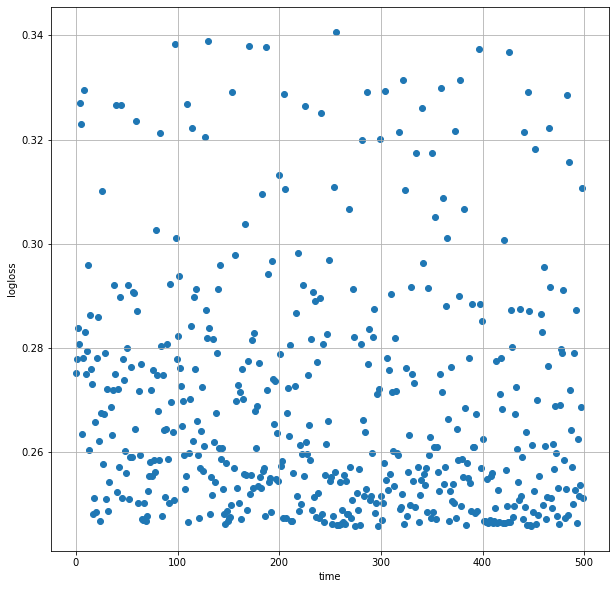

In [34]:
# from hyperopt's sources ....
plot.figure(figsize=(10,10))
plot.scatter(range(len(trials.losses())), trials.losses())
plot.xlabel("time")
plot.ylabel("logloss")
plot.grid(True)
print("avg best error:", best_err)
plot.axhline(best_err, c="g",label='avg best error')
plot.legend()
plot.title('Hyperopt on final model: logloss history')
plot_save('hyperopt_history')

#hyperopt.plotting.main_plot_histogram(trials)
#hyperopt.plotting.main_plot_vars(trials)

Let's redo this best model with our 'framework'

In [36]:
#All without ret
params= {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'colsample_bytree': 0.7000000000000001,
    'eta': 0.05,
    'gamma': 0.8500000000000001,
    'max_depth': 11,
    'min_child_weight': 3.0,
    'n_estimators': 868.0,
    'subsample': 0.9500000000000001}
#all
params= {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'colsample_bytree': 0.9,
     'eta': 0.05,
     'gamma': 0.7000000000000001,
     'max_depth': 10,
     'min_child_weight': 5.0,
     'n_estimators': 959.0,
     'subsample': 0.8500000000000001}

xgboost_best_optim = study_models_one_more_field_at_a_time(
    'everything optim',
    'everything_optim',
    ALL_FEATURES,
    train_dataframe,
    challenge_dataframe,
    explore = False,
    show = False)

[07:39:57] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




,accuracy,score,logloss_proba,time
count,1.000000,1.000000,1.000000,1.000000
mean,0.878606,0.870482,0.264211,126.527708
std,NaN,NaN,NaN,NaN
min,0.878606,0.870482,0.264211,126.527708
25%,0.878606,0.870482,0.264211,126.527708
50%,0.878606,0.870482,0.264211,126.527708
75%,0.878606,0.870482,0.264211,126.527708
max,0.878606,0.870482,0.264211,126.527708


Let's add this optimized model to the previous plot

In [ ]:
plot.figure(figsize=(10,10))

pal=sns.color_palette()
plot.ylim(0.28,0.5)
plot.plot(numpy.arange(1,9,1),xgboost_everything_results['logloss_proba'][1:9],color=pal[1],alpha=0.3)
plot.fill_between(numpy.arange(1,9,1),xgboost_everything_results['logloss_proba'][1:9],label='basic',color=pal[1],alpha=0.3)

plot.plot(numpy.arange(8,17,1),xgboost_everything_results['logloss_proba'][8:17],color=pal[2],alpha=0.3)
plot.fill_between(numpy.arange(8,17,1),xgboost_everything_results['logloss_proba'][8:17],label='nltk stopwords',color=pal[2],alpha=0.3)

plot.plot(numpy.arange(16,25,1),xgboost_everything_results['logloss_proba'][16:25],color=pal[3],alpha=0.3)
plot.fill_between(numpy.arange(16,25,1),xgboost_everything_results['logloss_proba'][16:25],label='nltk +sklearn stopwords',color=pal[3],alpha=0.3)

plot.plot(numpy.arange(24,33,1),xgboost_everything_results['logloss_proba'][24:33],color=pal[4],alpha=0.3)
plot.fill_between(numpy.arange(24,33,1),xgboost_everything_results['logloss_proba'][24:33],label='nltk +sklearn stopwords+clean',color=pal[4],alpha=0.3)

plot.plot(numpy.arange(32,41,1),xgboost_everything_results['logloss_proba'][32:41],color=pal[5],alpha=0.3)
plot.fill_between(numpy.arange(32,41,1),xgboost_everything_results['logloss_proba'][32:41],label='nltk +sklearn stopwords+clean+lemme',color=pal[5],alpha=0.3)

plot.plot(numpy.arange(40,89,1),xgboost_everything_results['logloss_proba'][40:89],color=pal[6],alpha=0.3)
plot.fill_between(numpy.arange(40,89,1),xgboost_everything_results['logloss_proba'][40:89],label='nltk +sklearn stopwords+clean+entities',color=pal[6],alpha=0.3)

plot.plot(numpy.arange(88,103,1),xgboost_everything_results['logloss_proba'][88:103],color=pal[7],alpha=0.3)
plot.fill_between(numpy.arange(88,103,1),xgboost_everything_results['logloss_proba'][88:103],label='nltk +sklearn stopwords+clean+entities+newsgroups',color=pal[7],alpha=0.3)

plot.plot(numpy.arange(101,103,1),xgboost_everything_results['logloss_proba'][101:103],color=pal[8],alpha=0.3)
plot.fill_between(numpy.arange(101,103,1),xgboost_everything_results['logloss_proba'][101:103],label='nltk +sklearn stopwords+clean+entities+newsgroups+similarity',color=pal[8],alpha=0.3)

plot.scatter(102,0.2867,color="red",label='optimized model')
plot.title('xgboost: logloss/Nb fields')
plot.xlabel('Nb fields')
plot.grid(True)
plot.legend()
plot_save('all_features_all_preprocess_optimized')

I will try to optimize interesting set of features

In [52]:
ALL_EASY_FEATURES=[c for c in all_numeric_columns(train_dataframe) if 'entities' not in c and 'entities' not in c and 'sim' not in c and 'lemm' not in c and 'confidence' not in c]
print(ALL_EASY_FEATURES)

['nb_words_question1', 'nb_words_question2', 'nb_common_words', 'nb_common_words/nb_words_question1', 'nb_common_words/nb_words_question2', 'nb_words_question1-common_words', 'nb_words_question2-common_words', 'nb_common_words/(nb_words_question1+nb_words_question2)', 'nltk_nb_words_question1', 'nltk_nb_words_question2', 'nltk_nb_common_words', 'nltk_nb_common_words/nltk_nb_words_question1', 'nltk_nb_common_words/nltk_nb_words_question2', 'nltk_nb_words_question1-nltk_common_words', 'nltk_nb_words_question2-nltk_common_words', 'nltk_nb_common_words/(nltk_nb_words_question1+nltk_nb_words_question2)', 'all_nb_words_question1', 'all_nb_words_question2', 'all_nb_common_words', 'all_nb_common_words/all_nb_words_question1', 'all_nb_common_words/all_nb_words_question2', 'all_nb_words_question1-all_common_words', 'all_nb_words_question2-all_common_words', 'all_nb_common_words/(all_nb_words_question1+all_nb_words_question2)', 'clean_all_nb_words_question1', 'clean_all_nb_words_question2', 'clea

In [54]:
trials_easy = Trials()
best_easy_xgboost_parameters = hyperopt_optimize(train_dataframe,train_dataframe['is_duplicate'],ALL_EASY_FEATURES,trials_easy,show=False)

0.31616466370401247                                    
0.31373422975125725                                                               
0.3390136224487134                                                                
0.3111557284875162                                                                
0.3169088914955502                                                                
0.29974425565861645                                                              
0.2948742242850709                                                                
0.3289301738300122                                                                 
0.3087476235607007                                                                 
0.2980002207285361                                                               
0.2934288968855511                                                                  
0.3551083492969651                                                                  
0.31064596435646796        

In [56]:
print(best_easy_xgboost_parameters)

{'colsample_bytree': 0.7000000000000001, 'eta': 0.05, 'gamma': 0.9500000000000001, 'max_depth': 11, 'min_child_weight': 2.0, 'n_estimators': 954.0, 'subsample': 0.9500000000000001}


recompute best easy model and submit

In [60]:
params= {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'colsample_bytree': 0.9,
     'eta': 0.05,
     'gamma': 0.9500000000000001,
     'max_depth': 11,
     'min_child_weight': 2.0,
     'n_estimators': 954.0,
     'subsample': 0.9500000000000001}

xgboost_best_easy_optim = study_models_one_more_field_at_a_time(
    'easy optim',
    'easy_optim',
    ALL_EASY_FEATURES,
    train_dataframe,
    challenge_dataframe,
    explore = False,
    show = False)

[11:18:48] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




,accuracy,score,logloss_proba,time
count,1.000000,1.000000,1.000000,1.000000
mean,0.853463,0.832838,0.300226,72.718449
std,NaN,NaN,NaN,NaN
min,0.853463,0.832838,0.300226,72.718449
25%,0.853463,0.832838,0.300226,72.718449
50%,0.853463,0.832838,0.300226,72.718449
75%,0.853463,0.832838,0.300226,72.718449
max,0.853463,0.832838,0.300226,72.718449


In [65]:
ALL_NON_SEMANTIC_FEATURES=[c for c in all_numeric_columns(train_dataframe) if 'entities' not in c and 'entities' not in c and 'sim' not in c and 'lemm' not in c and 'confidence' not in c and 'prob' not in c]
print(ALL_NON_SEMANTIC_FEATURES)
trials_non_semantic = Trials()
best_non_semantic_xgboost_parameters = hyperopt_optimize(train_dataframe,train_dataframe['is_duplicate'],ALL_NON_SEMANTIC_FEATURES,trials_non_semantic,show=False)

['nb_words_question1', 'nb_words_question2', 'nb_common_words', 'nb_common_words/nb_words_question1', 'nb_common_words/nb_words_question2', 'nb_words_question1-common_words', 'nb_words_question2-common_words', 'nb_common_words/(nb_words_question1+nb_words_question2)', 'nltk_nb_words_question1', 'nltk_nb_words_question2', 'nltk_nb_common_words', 'nltk_nb_common_words/nltk_nb_words_question1', 'nltk_nb_common_words/nltk_nb_words_question2', 'nltk_nb_words_question1-nltk_common_words', 'nltk_nb_words_question2-nltk_common_words', 'nltk_nb_common_words/(nltk_nb_words_question1+nltk_nb_words_question2)', 'all_nb_words_question1', 'all_nb_words_question2', 'all_nb_common_words', 'all_nb_common_words/all_nb_words_question1', 'all_nb_common_words/all_nb_words_question2', 'all_nb_words_question1-all_common_words', 'all_nb_words_question2-all_common_words', 'all_nb_common_words/(all_nb_words_question1+all_nb_words_question2)', 'clean_all_nb_words_question1', 'clean_all_nb_words_question2', 'clea

100%|██████████| 500/500 [52:23<00:00,  6.29s/trial, best loss: 0.32386419664209126] 
Here are the best parameters
{'colsample_bytree': 0.65, 'gamma': 0.8, 'max_depth': 11, 'min_child_weight': 6.0, 'n_estimators': 874.0, 'subsample': 0.9500000000000001}


In [66]:
params= {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'colsample_bytree': 0.65,
     'eta': 0.05,
     'gamma': 0.8,
     'max_depth': 11,
     'min_child_weight': 6.0,
     'n_estimators': 874.0,
     'subsample': 0.9500000000000001}

xgboost_best_non_semantic_optim = study_models_one_more_field_at_a_time(
    'non semantic',
    'non sematic',
    ALL_NON_SEMANTIC_FEATURES,
    train_dataframe,
    challenge_dataframe,
    explore = False,
    show = False)

[15:00:22] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




,accuracy,score,logloss_proba,time
count,1.000000,1.000000,1.000000,1.000000
mean,0.834323,0.798519,0.324101,34.079153
std,NaN,NaN,NaN,NaN
min,0.834323,0.798519,0.324101,34.079153
25%,0.834323,0.798519,0.324101,34.079153
50%,0.834323,0.798519,0.324101,34.079153
75%,0.834323,0.798519,0.324101,34.079153
max,0.834323,0.798519,0.324101,34.079153


In [76]:
ALL_FEATURES_RET6=[c for c in all_numeric_columns(train_dataframe) 
                   if 
                   ('entities' not in c and 'entities' not in c and 'sim' not in c and 'lemm' not in c  and 'prob' not in c and 'confidence' not in c)
                   or
                   ('1_6' in c or '2_6' in c)]
print(ALL_FEATURES_RET6)
trials_features_ret6 = Trials()
best_features_ret6_xgboost_parameters = hyperopt_optimize(train_dataframe,train_dataframe['is_duplicate'],ALL_FEATURES_RET6,trials_features_ret6,show=False)

['nb_words_question1', 'nb_words_question2', 'nb_common_words', 'nb_common_words/nb_words_question1', 'nb_common_words/nb_words_question2', 'nb_words_question1-common_words', 'nb_words_question2-common_words', 'nb_common_words/(nb_words_question1+nb_words_question2)', 'nltk_nb_words_question1', 'nltk_nb_words_question2', 'nltk_nb_common_words', 'nltk_nb_common_words/nltk_nb_words_question1', 'nltk_nb_common_words/nltk_nb_words_question2', 'nltk_nb_words_question1-nltk_common_words', 'nltk_nb_words_question2-nltk_common_words', 'nltk_nb_common_words/(nltk_nb_words_question1+nltk_nb_words_question2)', 'all_nb_words_question1', 'all_nb_words_question2', 'all_nb_common_words', 'all_nb_common_words/all_nb_words_question1', 'all_nb_common_words/all_nb_words_question2', 'all_nb_words_question1-all_common_words', 'all_nb_words_question2-all_common_words', 'all_nb_common_words/(all_nb_words_question1+all_nb_words_question2)', 'clean_all_nb_words_question1', 'clean_all_nb_words_question2', 'clea

100%|██████████| 500/500 [2:07:53<00:00, 15.35s/trial, best loss: 0.2830294892433616]  
Here are the best parameters
{'colsample_bytree': 0.65, 'gamma': 0.9, 'max_depth': 10, 'min_child_weight': 2.0, 'n_estimators': 997.0, 'subsample': 0.9500000000000001}


In [77]:
params= {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'colsample_bytree': 0.65,
     'eta': 0.05,
     'gamma': 0.9,
     'max_depth': 10,
     'min_child_weight': 2.0,
     'n_estimators': 997.0,
     'subsample': 0.9500000000000001}

xgboost_best_features_ret6_optim = study_models_one_more_field_at_a_time(
    'features and ret6',
    'features and ret6',
    ALL_FEATURES_RET6,
    train_dataframe,
    challenge_dataframe,
    explore = False,
    show = False)

[17:49:32] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




,accuracy,score,logloss_proba,time
count,1.000000,1.000000,1.000000,1.000000
mean,0.854141,0.835546,0.296429,64.784102
std,NaN,NaN,NaN,NaN
min,0.854141,0.835546,0.296429,64.784102
25%,0.854141,0.835546,0.296429,64.784102
50%,0.854141,0.835546,0.296429,64.784102
75%,0.854141,0.835546,0.296429,64.784102
max,0.854141,0.835546,0.296429,64.784102


In [81]:
ALL_FEATURES_RET50=[c for c in all_numeric_columns(train_dataframe) 
                   if 
                   ('entities' not in c and 'entities' not in c and 'sim' not in c and 'lemm' not in c  and 'prob' not in c and 'confidence' not in c)
                   or
                   ('1_50' in c or '2_50' in c)]
print(ALL_FEATURES_RET50)
trials_features_ret50 = Trials()
best_features_ret50_xgboost_parameters = hyperopt_optimize(train_dataframe,train_dataframe['is_duplicate'],ALL_FEATURES_RET50,trials_features_ret50,show=False)

['nb_words_question1', 'nb_words_question2', 'nb_common_words', 'nb_common_words/nb_words_question1', 'nb_common_words/nb_words_question2', 'nb_words_question1-common_words', 'nb_words_question2-common_words', 'nb_common_words/(nb_words_question1+nb_words_question2)', 'nltk_nb_words_question1', 'nltk_nb_words_question2', 'nltk_nb_common_words', 'nltk_nb_common_words/nltk_nb_words_question1', 'nltk_nb_common_words/nltk_nb_words_question2', 'nltk_nb_words_question1-nltk_common_words', 'nltk_nb_words_question2-nltk_common_words', 'nltk_nb_common_words/(nltk_nb_words_question1+nltk_nb_words_question2)', 'all_nb_words_question1', 'all_nb_words_question2', 'all_nb_common_words', 'all_nb_common_words/all_nb_words_question1', 'all_nb_common_words/all_nb_words_question2', 'all_nb_words_question1-all_common_words', 'all_nb_words_question2-all_common_words', 'all_nb_common_words/(all_nb_words_question1+all_nb_words_question2)', 'clean_all_nb_words_question1', 'clean_all_nb_words_question2', 'clea

100%|██████████| 500/500 [5:04:53<00:00, 36.59s/trial, best loss: 0.26989196205762966]  
Here are the best parameters
{'colsample_bytree': 0.5, 'gamma': 0.7000000000000001, 'max_depth': 11, 'min_child_weight': 1.0, 'n_estimators': 943.0, 'subsample': 0.8500000000000001}


In [83]:
params= {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'colsample_bytree': 0.5, 
    'gamma': 0.7000000000000001, 
    'max_depth': 11, 
    'min_child_weight': 1.0, 
    'n_estimators': 943.0, 
    'subsample': 0.8500000000000001}

xgboost_best_features_ret50_optim = study_models_one_more_field_at_a_time(
    'features and ret50',
    'features and ret0',
    ALL_FEATURES_RET50,
    train_dataframe,
    challenge_dataframe,
    explore = False,
    show = False)

[23:08:31] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




,accuracy,score,logloss_proba,time
count,1.000000,1.000000,1.000000,1.000000
mean,0.858365,0.857358,0.289947,42.440396
std,NaN,NaN,NaN,NaN
min,0.858365,0.857358,0.289947,42.440396
25%,0.858365,0.857358,0.289947,42.440396
50%,0.858365,0.857358,0.289947,42.440396
75%,0.858365,0.857358,0.289947,42.440396
max,0.858365,0.857358,0.289947,42.440396


What does Kaggle think about that model ?


In [41]:
all_submissions = load_kaggle_submissions()

KeyError: 'status'

In [42]:
get_last_submissions(all_submissions,10)

NameError: name 'all_submissions' is not defined

Ok We have a model quite acceptable for kaggle (in the first 33%)

Is it really a good model ? Kaggle score does not imply it is a good model

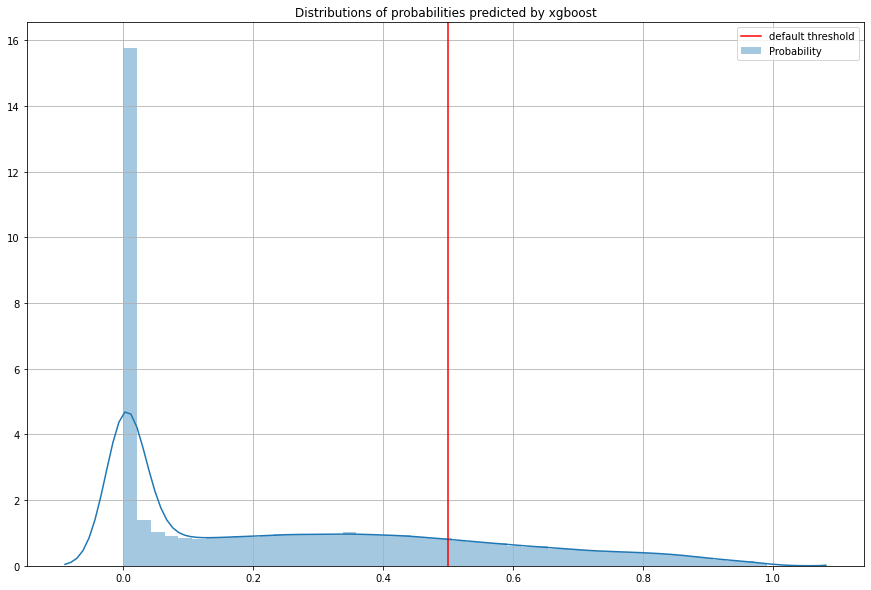

In [43]:
model = xgboost_best_optim['model'][0]
# do the usual split (80,20)
input_train,input_test,target_train,target_test = train_test_split(train_dataframe,train_dataframe['is_duplicate'],random_state=42,test_size=0.2)
test_probabilities = model.predict(xgboost.DMatrix(input_test[ALL_FEATURES]),ntree_limit=model.best_ntree_limit)
train_probabilities = model.predict(xgboost.DMatrix(input_train[ALL_FEATURES]),ntree_limit=model.best_ntree_limit)
challenge_probabilities = model.predict(xgboost.DMatrix(challenge_dataframe[ALL_FEATURES]),ntree_limit=model.best_ntree_limit)

# Apply the standard threshold
test_predictions = numpy.where(test_probabilities>0.5,1,0)
train_predictions = numpy.where(train_probabilities>0.5,1,0)
challenge_predictions = numpy.where(challenge_probabilities>0.5,1,0)

# What do we have in predictions
print_info('On test %% of true duplicates is %.3f' % (target_test.mean()*100.))
print_warning('On test %% of predicted duplicates is %.3f !!' % (test_predictions.mean()*100.))

print_info('On train %% of true duplicates is %.3f' % (target_train.mean()*100.))
print_warning('On train %% of predicted duplicates is %.3f !!' % (train_predictions.mean()*100.))

print_warning('On challenge %% of predicted duplicates is %.3f !!' % (challenge_predictions.mean()*100.))

plot.figure(figsize=(15,10))
sns.distplot(test_probabilities,label='Probability', kde=True)
plot.axvline(x=0.5,color='r',label='default threshold')
plot.legend()
plot.grid(True)
plot.title("Distributions of probabilities predicted by xgboost")
plot_save('distribution_uncalibrated_probabilities_xgboost')

What about the confusion matrix

              precision    recall  f1-score   support

           0       0.90      0.96      0.93 66475.35427891841
           1       0.72      0.52      0.60 14213.525233116525

    accuracy                           0.88 80688.87951203494
   macro avg       0.81      0.74      0.76 80688.87951203494
weighted avg       0.87      0.88      0.87 80688.87951203494



<Figure size 720x720 with 0 Axes>

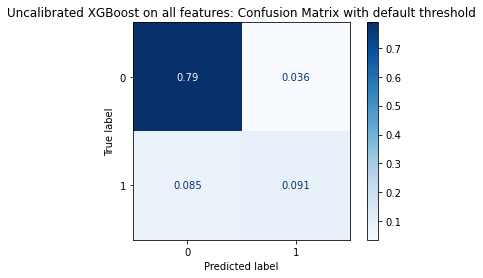

In [44]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

def show_confusion_matrix(model,columns,input,target):
    input_train,input_test,target_train,target_test = train_test_split(input,target,random_state=42,test_size=0.2)
    input_train_weight = input_train['weight']
    input_test_weight = input_test['weight']

    test_probabilities = model.predict(xgboost.DMatrix(input_test[columns]),ntree_limit=model.best_ntree_limit)

    test_predictions = numpy.where(test_probabilities>0.5,1,0)
    # Last minute check
    nb_0 = numpy.where(test_predictions==0,1,0).sum()
    nb_1 = numpy.where(test_predictions==1,1,0).sum()
    assert (nb_1+nb_0) == len(test_predictions)

    print_info('Performances')
    print(metrics.classification_report(target_test,test_predictions,sample_weight=input_test_weight))
    print_warning('%% prediction of is_duplicate=1 in test !!! : %.3f' % (test_predictions.mean()*100.))
    logloss_proba = metrics.log_loss(target_test,test_probabilities,sample_weight=input_test_weight,normalize=True)
    print_warning('logloss in test %.3f' % logloss_proba)

    # display cool graphs
    #plot.figure(figsize=(10, 10))
    #fig,ax = plot.subplots()
    #uncalibrated_confusion_matrix = confusion_matrix(target_test,test_predictions,sample_weight=input_test_weight)
    #ConfusionMatrixDisplay(uncalibrated_confusion_matrix).plot(cmap=plot.cm.Blues,values_format=".0f",ax=ax)
    #plot.title('Default XGBoost on all features: Confusion Matrix with default threshold')
    #plot_save('uncalibrated_xgboost_all_features_confusion_matrix1')

    plot.figure(figsize=(10, 10))
    fig,ax = plot.subplots()
    uncalibrated_confusion_matrix = confusion_matrix(target_test,test_predictions,sample_weight=input_test_weight,normalize="all")
    ConfusionMatrixDisplay(uncalibrated_confusion_matrix).plot(cmap=plot.cm.Blues,ax=ax)
    plot.title('Uncalibrated XGBoost on all features: Confusion Matrix with default threshold')
    plot_save('uncalibrated_xgboost_all_features_confusion_matrix2')
    


show_confusion_matrix(model,ALL_FEATURES,train_dataframe,train_dataframe['is_duplicate'])

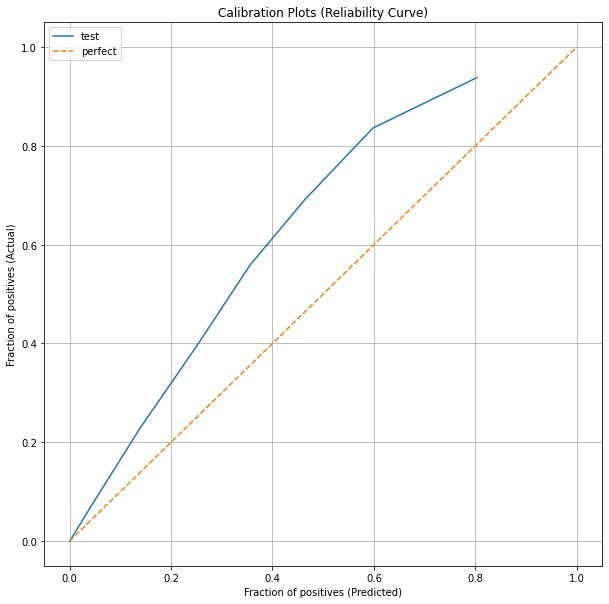

In [45]:
from sklearn.calibration import calibration_curve

plot.figure(figsize=(10,10))
plot_test_truth, plot_test_predictions = calibration_curve(target_test, test_probabilities,strategy='quantile', n_bins=10)
plot.plot(plot_test_predictions, plot_test_truth,label='test')
# Useless to draw train curve : almost identical to test and therefore, invisible
# plot_train_truth, plot_train_predictions = calibration_curve(target_train, train_probabilities,strategy='quantile', n_bins=10)
# plot.plot(plot_train_predictions, plot_train_truth,label='train')

xmin = min(plot_test_predictions.min(), plot_test_truth.min())
xmax = max(plot_test_predictions.max(), plot_test_truth.max())
#plot.plot([xmin,xmax],[xmin,xmax], '--',label='perfect')
plot.plot([0, 1], [0, 1], '--', label='perfect')
plot.xlabel('Fraction of positives (Predicted)')
plot.ylabel('Fraction of positives (Actual)')
plot.ylim([-0.05, 1.05])
plot.legend() # loc='upper left', ncol=2)
plot.title('Calibration Plots (Reliability Curve)')
plot.grid(True)
plot_save('xgboost_calibration_issue')

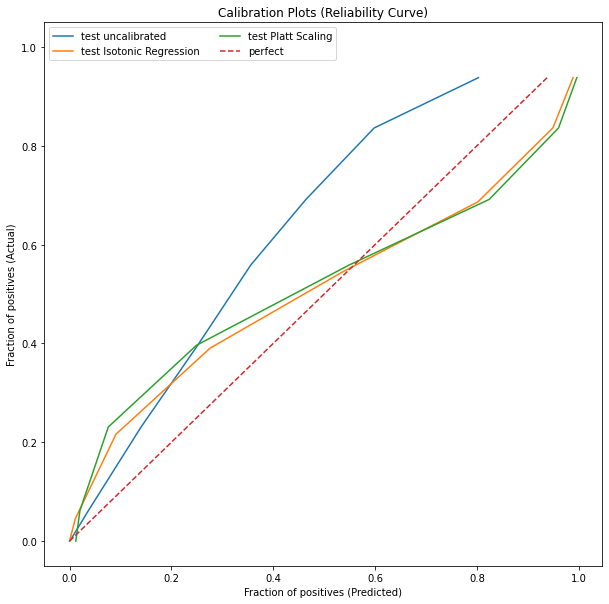

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator
from sklearn.calibration import IsotonicRegression


class MyPlattScaling(BaseEstimator):
    def __init__(self, log_odds: bool=True):
        self.log_odds = log_odds
    
    def fit(self, y_prob: numpy.ndarray, y_true: numpy.ndarray):
        self.fit_predict(y_prob, y_true)
        return self

    @staticmethod
    def _convert_to_log_odds(y_prob: numpy.ndarray):
        eps = 1e-12
        y_prob = numpy.clip(y_prob, eps, 1 - eps)
        y_prob = numpy.log(y_prob / (1 - y_prob))
        return y_prob

    def predict(self, y_prob: numpy.ndarray):
        if self.log_odds:
            y_prob = self._convert_to_log_odds(y_prob)

        output = self._transform(y_prob)
        return output

    def _transform(self, y_prob: numpy.ndarray):
        output = y_prob * self.coef_[0] + self.intercept_
        output = 1 / (1 + numpy.exp(-output))
        return output

    def fit_predict(self, y_prob: numpy.ndarray, y_true: numpy.ndarray) -> numpy.ndarray:
        if self.log_odds:
            y_prob = self._convert_to_log_odds(y_prob)

        # the class expects 2d ndarray as input features
        logistic = LogisticRegression(C=1e10, solver='lbfgs')
        logistic.fit(y_prob.reshape(-1, 1), y_true)
        self.coef_ = logistic.coef_[0]
        self.intercept_ = logistic.intercept_

        y_calibrated_prob = self._transform(y_prob)
        return y_calibrated_prob


isotonic = IsotonicRegression(out_of_bounds='clip',
                              y_min=train_probabilities.min(),
                              y_max=train_probabilities.max())
# still valid: learn on train, predict on test
isotonic.fit(train_probabilities,target_train)
isotonic_test_probabilities = isotonic.predict(test_probabilities)
isotonic_challenge_probabilities = isotonic.predict(challenge_probabilities)

platt = MyPlattScaling(log_odds=False)
# still valid: learn on train, predict on test
platt.fit(train_probabilities,target_train)
platt_test_probabilities = platt.predict(test_probabilities)
#platt_train_probabilities = platt.predict(train_probabilities)
platt_challenge_probabilities = platt.predict(challenge_probabilities)

# fig,ax = plot.subplots()
plot.figure(figsize=(10, 10))
plot_test_truth, plot_test_predictions = calibration_curve(target_test, test_probabilities,strategy='quantile', n_bins=10)
plot.plot(plot_test_predictions, plot_test_truth,label='test uncalibrated')

plot_test_truth, plot_test_predictions = calibration_curve(target_test, isotonic_test_probabilities,strategy='quantile', n_bins=10)
plot.plot(plot_test_predictions, plot_test_truth,label='test Isotonic Regression')

plot_test_truth, plot_test_predictions = calibration_curve(target_test, platt_test_probabilities,strategy='quantile', n_bins=10)
plot.plot(plot_test_predictions, plot_test_truth,label='test Platt Scaling')
plot.plot([xmin,xmax],[xmin,xmax], '--',label='perfect')
plot.xlabel('Fraction of positives (Predicted)')
plot.ylabel('Fraction of positives (Actual)')
plot.ylim([-0.05, 1.05])
plot.legend(loc='upper left', ncol=2)
plot.title('Calibration Plots (Reliability Curve)')
plot_save('reliability_curve')

isotonic_test_predictions = numpy.where(isotonic_test_probabilities>0.5,1,0)
isotonic_challenge_predictions = numpy.where(isotonic_challenge_probabilities>0.5,1,0)
print_warning('Now, on test we have %.3f %% of 1 using Isotonic"s recalibrated probabilities' % (100.*isotonic_test_predictions.mean()))
print_warning('And, on challenge we have %.3f %% of 1 using Isotonic"s recalibrated probabilities' % (100.*isotonic_challenge_predictions.mean()))

platt_test_predictions = numpy.where(platt_test_probabilities>0.5,1,0)
platt_challenge_predictions = numpy.where(platt_challenge_probabilities>0.5,1,0)
print_info('Now, we have %.3f %% of 1 using Platt scaling"s recalibrated probabilities' % (100.*platt_test_predictions.mean()))
print_info('And, on challenge we have %.3f %% of 1 using Platt scaling"s recalibrated probabilities' % (100.*platt_challenge_predictions.mean()))

Text(0.5, 1.0, 'Distributions  of probabilities')

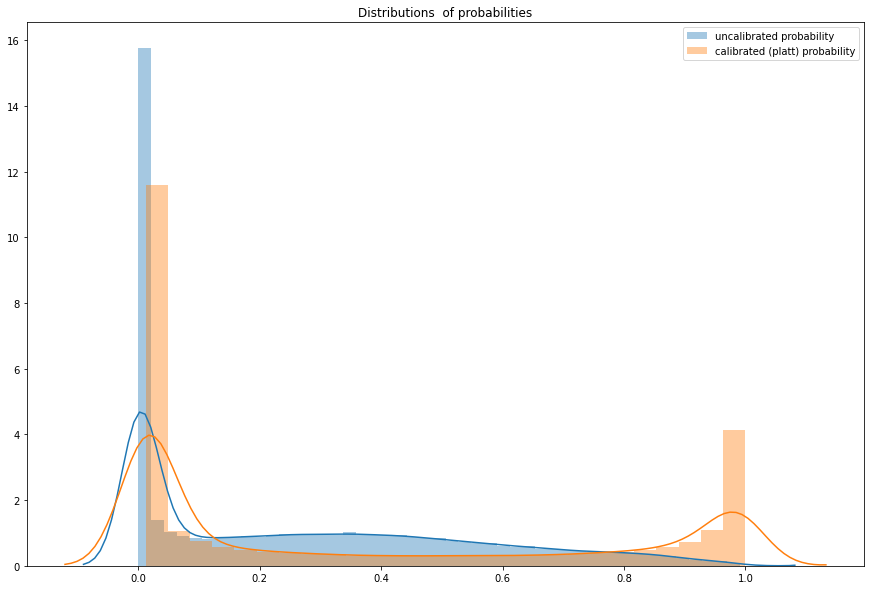

In [47]:
 plot.figure(figsize=(15,10))
 sns.distplot(test_probabilities,label='uncalibrated probability', kde=True)
 sns.distplot(platt_test_probabilities,label='calibrated (platt) probability', kde=True)
 #sns.distplot(isotonic_test_probabilities,label='calibrated (platt) probability', kde=True)
 plot.legend()
 plot.title("Distributions  of probabilities")

In [48]:
print_info('Test has %d rows' %len(target_test))

print_warning('Uncalibrated')
print_warning("logloss % .3f" % metrics.log_loss(target_test,test_probabilities,sample_weight = input_test['weight']))
print(metrics.classification_report(target_test,test_predictions,sample_weight = input_test['weight']))

print_info('Calibrated')
print_info("logloss % .3f" % metrics.log_loss(target_test,platt_test_probabilities,sample_weight = input_test['weight']))
print(metrics.classification_report(target_test,platt_test_predictions,sample_weight = input_test['weight']))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93 66475.35427891841
           1       0.72      0.52      0.60 14213.525233116525

    accuracy                           0.88 80688.87951203494
   macro avg       0.81      0.74      0.76 80688.87951203494
weighted avg       0.87      0.88      0.87 80688.87951203494



              precision    recall  f1-score   support

           0       0.95      0.87      0.91 66475.35427891841
           1       0.56      0.77      0.65 14213.525233116525

    accuracy                           0.85 80688.87951203494
   macro avg       0.75      0.82      0.78 80688.87951203494
weighted avg       0.88      0.85      0.86 80688.87951203494



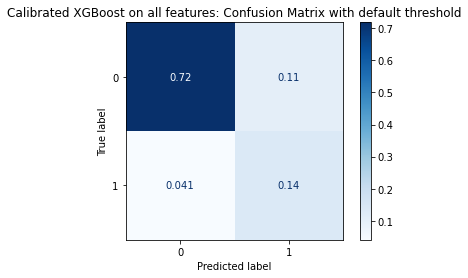

In [49]:
print_info('Calibrated with Plott Scaling')
#calibrated_confusion_matrix = confusion_matrix(target_test,platt_test_predictions,sample_weight=input_test['weight'])
#ConfusionMatrixDisplay(calibrated_confusion_matrix).plot(cmap=plot.cm.Blues,values_format=".0f")
calibrated_confusion_matrix = confusion_matrix(target_test,platt_test_predictions,sample_weight=input_test['weight'],normalize="all")
ConfusionMatrixDisplay(calibrated_confusion_matrix).plot(cmap=plot.cm.Blues)
plot.title('Calibrated XGBoost on all features: Confusion Matrix with default threshold')
plot_save('calibrated_xgboost_all_features_confusion_matrix2')

We have a model. Let's dig:

* what are the important features
* can we get rid of some features (hopefully the heavy ones)


BE CAREFUL : except univariables, all that does not work ...

is_duplicate                                                              1.000000
all_nb_common_words/(all_nb_words_question1+all_nb_words_question2)       0.456488
nltk_nb_common_words/(nltk_nb_words_question1+nltk_nb_words_question2)    0.456047
all_nb_common_words/all_nb_words_question1                                0.447348
nltk_nb_common_words/nltk_nb_words_question1                              0.445528
                                                                            ...   
1_50_NUM_temp_confidence                                                  0.001310
ratio_nb_entities_common_PRODUCT                                          0.000879
proba_vehicles_question1                                                  0.000741
nb_entities_common_PRODUCT                                                0.000240
nb_entities_WORK_OF_ART_question2                                         0.000045
Name: is_duplicate, Length: 216, dtype: float64


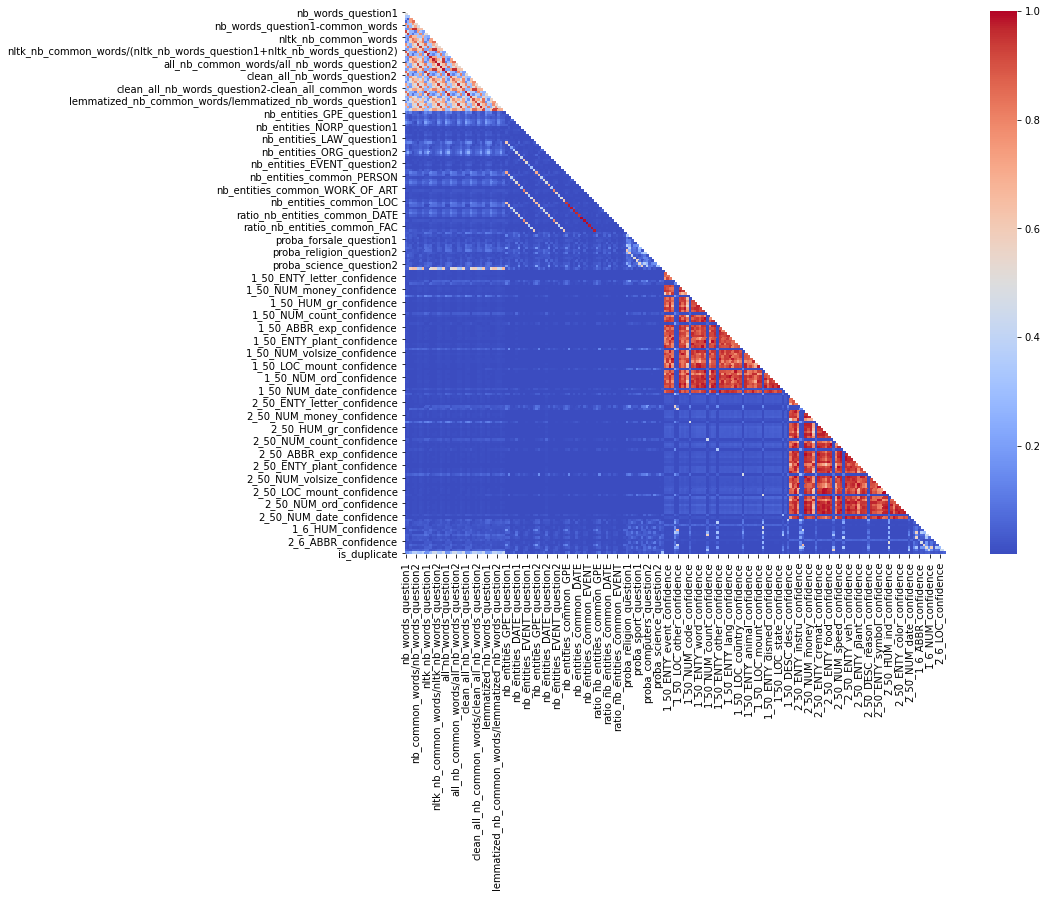

KeyboardInterrupt: 

In [50]:
from sklearn import feature_selection
from sklearn.feature_selection import SelectKBest,f_classif,RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA

def graph_relative_feature_importance(features_importances,columns):
    # Make importances relative to max importance.
    features_importances = 100.0 * (features_importances / features_importances.max())
    sorted_idx = numpy.argsort(features_importances)
    sorted_idx = sorted_idx[-20:-1:1]
    pos = numpy.arange(sorted_idx.shape[0]) + 0.5
    plot.barh(pos, features_importances[sorted_idx], align='center')
    plot.yticks(pos, columns)
    plot.xlabel('Relative Importance')
    plot.title('Relative Feature Importance', fontsize=30)
    plot.tick_params(axis='x', which='major', labelsize=15)
    sns.despine(left=True, bottom=True)
    plot.show()

def graph_feature_importance(features_importances,columns):
    # Make importances relative to max importance.
    sorted_idx = numpy.argsort(features_importances)
    sorted_idx = sorted_idx[-20:]
    pos = numpy.arange(sorted_idx.shape[0]) + 0.5
    plot.barh(pos, features_importances[sorted_idx], align='center')
    plot.yticks(pos, columns)
    plot.xlabel('Importance')
    plot.title('Feature Importance', fontsize=30)
    plot.tick_params(axis='x', which='major', labelsize=15)
    #sns.despine(left=True, bottom=True)
    plot.show()

def independant_features_analysis(name_data,input_df,target_df):
    train_df = input_df[all_numeric_columns(input_df)]
    target_df = target_df
    small = int(len(target_df)*0.05)
    small_train = train_df.sample(small,random_state=42)
    small_target = target_df.sample(small,random_state=42)
    small_weights = input_df[WEIGHT].sample(small,random_state=42)

    # be careful all_numeric will include also the target soon
    all_numeric = all_numeric_columns(input_df)
    print_section('Minimal analysis of numeric features of %s' % name_data)
    print_info('Nb features: %d' % len(all_numeric))
    print_info(str(all_numeric))
    print_warning('Is there any null value ? %s' % input_df.isnull().any().any())

    compute_variances = feature_selection.VarianceThreshold()
    all_numeric.append('is_duplicate')
    variances = compute_variances.fit_transform(input_df[all_numeric])
    print_warning('Is there any low variance feature ? %s' % str(variances.shape[1]!=len(all_numeric)))
    print_info('Here are the correlations to the target "is_duplicate"')
    correlation_matrix = input_df[all_numeric].corr().abs()
    print(correlation_matrix['is_duplicate'].nlargest(len(all_numeric)))

    correlation_matrix_without_is_duplicate = correlation_matrix['is_duplicate'][correlation_matrix['is_duplicate']<1]
    highest_correlated_feature = correlation_matrix_without_is_duplicate.nlargest(1).index[0]
    highest_correlation = correlation_matrix_without_is_duplicate.nlargest(1)[0]
    if highest_correlation >0.2:
        if highest_correlation < 0.5:
            print_warning('%s is the most correlated with target but %f is quite weak' % (highest_correlated_feature,highest_correlation))
        else:
            print_info('%s is the most correlated with target but %f is very weak' % (highest_correlated_feature,highest_correlation))
    else:
        print_alert('%s is the most correlated with target and %f is quite big' % (highest_correlated_feature,highest_correlation))
    plot.figure(figsize=(15, 10))
    sns.heatmap(correlation_matrix,annot=False,cbar=True,square=True,cmap='coolwarm',mask = numpy.triu(correlation_matrix))
    plot.show()

    # we keep only numeric features and remove is_duplicate
    all_numeric = all_numeric_columns(input_df)

    print_section('Here are the features that would be selected with a simple univariate analysis')
    start = time.time()
    #for r in tqdm(range(1,len(all_numeric))):
    for r in [103]:
        k_best = SelectKBest(score_func=f_classif,k=r)
        fit = k_best.fit(small_train,small_target)
        best_columns = [small_train.columns[c] for c in fit.get_support(indices=True)]
        print_info('Nb features to keep %d:%s' %(r,best_columns))
        
        # Can we graph relative importances
        if r>1:
            # transform train set so we can compute importances
            univariate_features = fit.transform(small_train)
            rfc = RandomForestClassifier(n_estimators=100)
            rfc_scores = cross_val_score(rfc, univariate_features, small_target, cv=5, scoring='neg_log_loss',n_jobs=os.cpu_count())
            features_importance = rfc.fit(univariate_features, small_target).feature_importances_
            graph_relative_feature_importance(features_importance,best_columns)
    print_done('Done',top=start)
    
    

    print_info('Try to keep x \% of variance with a PCA')
    print_alert('bug ?')
    start = time.time()
    for r in tqdm([.8,.9,.95]):
        acp = PCA(r)
        principal_components = acp.fit_transform(small_train)
        principal_df = pandas.DataFrame(principal_components).sample(small,random_state=42)
        rfc = RandomForestClassifier(n_estimators=100)
        rfc_scores = cross_val_score(rfc, principal_df, small_target, cv=5, scoring='neg_log_loss',n_jobs=os.cpu_count())
        features_importance = rfc.fit(principal_df, small_target).feature_importances_
        print_info('%% of variance %f:%s' %(r,'aie'))
        graph_relative_feature_importance(features_importance,small_train.columns)
    print_done('Done',top=start)

    print_section('Here are the features that would be selected with a recursive feature elimination')
    start = time.time()
    print_alert('Doomed to fail : RFE does not support to transmit ,sample_weight=small_weights')
    print_alert('ix is waiting since 2016 ?')
    for r in tqdm(range(1,len(all_numeric))):
        mnb = MultinomialNB()
        recursive_best= feature_selection.RFE(mnb, n_features_to_select=r)
        fit = recursive_best.fit(small_train,small_target)
        best_columns = [small_train.columns[c] for c in fit.get_support(indices=True)]
        print_info('Nb features to keep %d:%s' %(r,best_columns))
        
        # Can we graph relative importances
        if r>1:
            # transform train set so we can compute importances
            recursive_features = fit.transform(small_train)
            rfc = RandomForestClassifier(n_estimators=100)
            rfc_scores = cross_val_score(rfc, recursive_features, small_target, cv=5, scoring='neg_log_loss',n_jobs=os.cpu_count())
            features_importance = rfc.fit(recursive_features, small_target).feature_importances_
            graph_relative_feature_importance(features_importance,best_columns)
    print_done('Done',top=start)

independant_features_analysis('train',train_dataframe,train_dataframe['is_duplicate'])

<Figure size 1080x720 with 0 Axes>

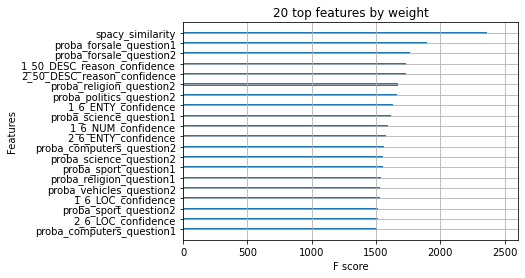

<Figure size 1080x720 with 0 Axes>

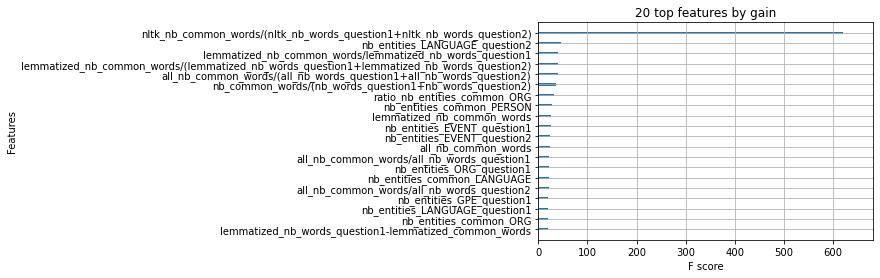

In [51]:
from xgboost import plot_tree
#ax, height, xlim, ylim, title, xlabel, ylabel, fmap, importance_type, max_num_features, grid, show_values, **kwargs
def show_topn_features(model,importance_type,top=10):
    plot.figure(figsize=(15,10))
    fig,ax = plot.subplots()
    ax = xgboost.plot_importance(model,max_num_features=top,ax = ax ,title='%d top features by %s' % (top,importance_type),grid=True,show_values=False,importance_type=importance_type)
    yticklabels = ax.get_yticklabels()[::-1]
    if top == -1:
        top = len(yticklabels)
    else:
        top = min(top, len(yticklabels))
        print_section("importance by %s" % importance_type)
    features = [yticklabels[i].get_text() for i in range(top)]
    print_info(str(features))
    return features
        
#plot.figure(figsize=(30, 20))
#xgboost.plot_importance(model,max_num_features=18)#
#plot.show()

top_by_weight = show_topn_features(model,importance_type='weight',top=20)
top_by_gain = show_topn_features(model,importance_type='gain',top=20)
features_to_keep_39 = list(set.union(set(top_by_weight),set(top_by_gain)))
print_section('Top %d features to keep' % len(features_to_keep_39))
print_info(str(features_to_keep_39))


#  I don't understand what this is 
# show_topn_features(model,importance_type='cover',top=20)

We have selected 39 variables that looked like important for xgboost
What is happening if we recompute a model with only these variables ?

**My decision** I keep the parameters from optimisation on everything 

In [ ]:

params= {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'colsample_bytree': 0.7000000000000001,
    'eta': 0.05,
    'gamma': 0.8500000000000001,
    'max_depth': 11,
    'min_child_weight': 3.0,
    'n_estimators': 868.0,
    'subsample': 0.9500000000000001}
    
    
xgboost_39 = study_models_one_more_field_at_a_time(
    '39 features all_preprocess optim',
    '39_features_all_preprocess_optim',
    features_to_keep_39,
    train_dataframe,
    challenge_dataframe,
    explore = False,
    show = False)

In [ ]:
all_submissions = load_kaggle_submissions()
get_last_submissions(all_submissions,10)

In [ ]:
top_by_weight = show_topn_features(model,importance_type='weight',top=10)
top_by_gain = show_topn_features(model,importance_type='gain',top=10)
features_to_keep_20 = list(set.union(set(top_by_weight),set(top_by_gain)))
print_section('Top %d features to keep' % len(features_to_keep_20))
print_info(str(features_to_keep_20))

In [ ]:
params= {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'colsample_bytree': 0.7000000000000001,
    'eta': 0.05,
    'gamma': 0.8500000000000001,
    'max_depth': 11,
    'min_child_weight': 3.0,
    'n_estimators': 868.0,
    'subsample': 0.9500000000000001}
    
    
xgboost_20 = study_models_one_more_field_at_a_time(
    '20 features all_preprocess optim',
    '20_features_all_preprocess_optim',
    features_to_keep_20,
    train_dataframe,
    challenge_dataframe,
    explore = False,
    show = False)

In [ ]:
all_submissions = load_kaggle_submissions()
get_last_submissions(all_submissions,10)

Strategy : semantic features only


In [ ]:
ALL_SEMANTIC_FEATURES=[c for c in all_numeric_columns(train_dataframe) if 'entities' in c or 'proba' in c or 'sim' in c]
print(ALL_SEMANTIC_FEATURES)

In [ ]:
xgboost_semantic = study_models_one_more_field_at_a_time(
    'semantic features  optim',
    'semantic_features_optim',
    ALL_SEMANTIC_FEATURES,
    train_dataframe,
    challenge_dataframe,
    explore = False,
    show = False)

In [ ]:
all_submissions = load_kaggle_submissions()
get_last_submissions(all_submissions,10)

In [ ]:
ALL_EASY_FEATURES=[c for c in all_numeric_columns(train_dataframe) if 'entities' not in c and 'entities' not in c and 'sim' not in c and 'lemm' not in c]
print(ALL_EASY_FEATURES)

In [ ]:
xgboost_easy = study_models_one_more_field_at_a_time(
    'easy features  optim',
    'easy_features_optim',
    ALL_EASY_FEATURES,
    train_dataframe,
    challenge_dataframe,
    explore = False,
    show = False)